In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score
import time # to measure how long the models take
from sklearn import datasets
import seaborn as sns
from scipy.stats import mode
from sklearn.preprocessing import MinMaxScaler
import os
import matplotlib.pyplot as plt

In [6]:
# load dataset
data = pd.read_excel("C:/Users/tauny/Desktop/Schulich - School/ACP/Data/Schulich MBAN - Data Sheet .xlsx")

In [7]:
data.head()

Client ID Survey Response Date Survey Response Channel  NPS Score  \
0  939L4933M74330OZ           2024-02-25                  Mobile          0   
1  429I6439D19572YJ           2024-01-24                  Online          9   
2  920A8054B28169QO           2024-05-22                  Online          9   
3  957H8335M34557RI           2023-12-08                  Mobile         10   
4  490W8554J38739BQ           2024-07-29                  Mobile          8   

  Client First Service Date       Age Gender Province  \
0                1985-01-17  51 to 65      F       ON   
1                1988-01-26  51 to 65      F       BC   
2                2019-01-13  19 to 35      F       NS   
3                1998-01-03  36 to 50      F       ON   
4                1987-01-08  81 to 85      M       NB   

   High Value Client Indicator  Has Credit Card  Has Deposit Account  \
0                            0                0                    1   
1                            0                1                    1   
2                            0                1                    1   
3                            0                1                    1   
4                            0                1                    1   

   Has Investment Account  Has Borrowing Product  Total Product Count  \
0                       0                      1                    4   
1                       1                      1                    7   
2                       0                      0                    3   
3                       0                      1                    4   
4                       0                      0                    4   

   Total Funds Managed  Chequing Balance  Savings Balance  \
0                400.0             300.0              NaN   
1              82600.0           39700.0            200.0   
2              15000.0            1300.0              0.0   
3              19000.0            1700.0              NaN   
4               3500.0            1500.0              NaN   

   Credit Card Balance Client Attrited  
0                  NaN              No  
1                  0.0              No  
2              12000.0              No  
3               6500.0              No  
4               1000.0              No

In [8]:
data.describe()

Survey Response Date     NPS Score  \
count                          11044  11044.000000   
mean   2024-03-13 19:37:08.323071232      8.533774   
min              2023-09-20 00:00:00      0.000000   
25%              2023-12-06 00:00:00      8.000000   
50%              2024-03-20 00:00:00     10.000000   
75%              2024-06-20 00:00:00     10.000000   
max              2024-08-28 00:00:00     10.000000   
std                              NaN      2.322118   

           Client First Service Date  High Value Client Indicator  \
count                          11044                 11044.000000   
mean   2002-10-27 11:22:34.726548224                     0.196577   
min              1968-01-04 00:00:00                     0.000000   
25%              1990-01-10 00:00:00                     0.000000   
50%              2003-01-07 00:00:00                     0.000000   
75%              2017-01-27 00:00:00                     0.000000   
max              2024-01-31 00:00:00                     1.000000   
std                              NaN                     0.397428   

       Has Credit Card  Has Deposit Account  Has Investment Account  \
count     11044.000000         11044.000000            11044.000000   
mean          0.837468             0.935531                0.449475   
min           0.000000             0.000000                0.000000   
25%           1.000000             1.000000                0.000000   
50%           1.000000             1.000000                0.000000   
75%           1.000000             1.000000                1.000000   
max           1.000000             1.000000                1.000000   
std           0.368955             0.245598                0.497463   

       Has Borrowing Product  Total Product Count  Total Funds Managed  \
count           11044.000000         11044.000000         1.102400e+04   
mean                0.520645             5.190148         1.126389e+05   
min                 0.000000             1.000000         0.000000e+00   
25%                 0.000000             3.000000         4.475000e+03   
50%                 1.000000             5.000000         2.030000e+04   
75%                 1.000000             7.000000         1.007250e+05   
max                 1.000000            17.000000         2.392490e+07   
std                 0.499596             2.567722         3.381082e+05   

       Chequing Balance  Savings Balance  Credit Card Balance  
count      10085.000000      6552.000000          9249.000000  
mean        7152.077343     10598.565324          3245.356255  
min            0.000000         0.000000        -19100.000000  
25%          400.000000       100.000000           100.000000  
50%         1900.000000      1200.000000           800.000000  
75%         6000.000000      8400.000000          3200.000000  
max       647100.000000    781400.000000        132100.000000  
std        21199.729228     31846.414714          6512.322654

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11044 entries, 0 to 11043
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Client ID                    11044 non-null  object        
 1   Survey Response Date         11044 non-null  datetime64[ns]
 2   Survey Response Channel      11044 non-null  object        
 3   NPS Score                    11044 non-null  int64         
 4   Client First Service Date    11044 non-null  datetime64[ns]
 5   Age                          11044 non-null  object        
 6   Gender                       11044 non-null  object        
 7   Province                     11041 non-null  object        
 8   High Value Client Indicator  11044 non-null  int64         
 9   Has Credit Card              11044 non-null  int64         
 10  Has Deposit Account          11044 non-null  int64         
 11  Has Investment Account       11044 non-nu

In [10]:
 # Count missing values in each column
print(data.isnull().sum())

Client ID                         0
Survey Response Date              0
Survey Response Channel           0
NPS Score                         0
Client First Service Date         0
Age                               0
Gender                            0
Province                          3
High Value Client Indicator       0
Has Credit Card                   0
Has Deposit Account               0
Has Investment Account            0
Has Borrowing Product             0
Total Product Count               0
Total Funds Managed              20
Chequing Balance                959
Savings Balance                4492
Credit Card Balance            1795
Client Attrited                   0
dtype: int64


Missing vals = Province, Total Funds Managed, Chequing Balance, Savings Balance, Credit Card Balance

In [11]:
# Check for duplicates
print(data.duplicated().sum())

0


# ASSUMPTION IS THAT NULL VALUES REPRESENT NO ACCOUNT INSTEAD OF HAVING ACCOUNTS WITH A ZERO BALANCE. THEREFORE PRODUCT? ACCOUNT DOES NOT EXIST WITH CLIENT.
Given the null values in credit card, chequings, and savings accounts likely represent no account, filling them in with monetary amounts will not be an accurate representation because this account does not exist for these clients.
We will instead replace the null vals with 0, and create another columns indicating whether or not the client has these accounts.


MAY NEED TO ADJUST THIS PART*********    0 might be fine without a new col.

Chequing Balance, Savings Balance, and Credit Card Balance Nulls

In [12]:
# Fill null values in 'Chequing Balance', 'Savings Balance', and 'Credit Card Balance' with 0
data['Chequing Balance'] = data['Chequing Balance'].fillna(0)
data['Savings Balance'] = data['Savings Balance'].fillna(0)
data['Credit Card Balance'] = data['Credit Card Balance'].fillna(0)

# Create indicators for having each type of account
data['Has Chequing Account'] = data['Chequing Balance'].apply(lambda x: 1 if x > 0 else 0)
data['Has Savings Account'] = data['Savings Balance'].apply(lambda x: 1 if x > 0 else 0)
data['Has Credit Card Account'] = data['Credit Card Balance'].apply(lambda x: 1 if x > 0 else 0)

Province Nulls

In [13]:
# Display rows where 'Province' has missing values
missing_province_rows = data[data['Province'].isnull()]

# Show the rows
print(missing_province_rows)

             Client ID Survey Response Date Survey Response Channel  \
156   937W6753V62366MQ           2024-03-25                  Online   
659   483Y1962M50336VU           2023-11-15                  Mobile   
4892  783K3136E24774CX           2024-02-25                  Mobile   

      NPS Score Client First Service Date       Age Gender Province  \
156           6                2002-01-24  71 to 75      F      NaN   
659           9                2019-01-31  51 to 65      M      NaN   
4892          8                2018-01-01  71 to 75      M      NaN   

      High Value Client Indicator  Has Credit Card  ...  \
156                             0                1  ...   
659                             1                0  ...   
4892                            0                0  ...   

      Has Borrowing Product  Total Product Count  Total Funds Managed  \
156                       0                    3               1500.0   
659                       1                    

Since one of the 3 'Null' vals is a high value customer, and the others carry varying balances, we will replace the province with 'Unknown' to allow for further analysis and not exclude potentially important variables.

In [14]:
# Replace missing values in 'Province' with 'Unknown'
data['Province'] = data['Province'].fillna('Unknown')

Total Funds Managed Nulls
We replace null with 0 for this feature. This is because they show as having existing products - but no balances anywhere, so potentially products are now paid off or at 0.

In [15]:
# Replace null values in 'Total Funds Managed' with 0
data['Total Funds Managed'] = data['Total Funds Managed'].fillna(0)

Gender, Survey Response Channel, and Client Attrited to be converted to numerical.

In [16]:
# To determine how many different variables in the Survey Response Feature to decide whether one-hot encoding is needed, or if we can map values directly to integers.
data['Survey Response Channel'].nunique()

2

Only two options avaialble, so it can be convereted to 0 and 1 numerical values.

In [17]:
data['Survey Response Channel'].unique()

array(['Mobile', 'Online'], dtype=object)

In [18]:
# To determine how many different variables in Gender to decide whether one-hot encoding is needed, or if we can map values directly to integers.
data['Gender'].unique()

array(['F', 'M', 'U'], dtype=object)

In [19]:
#More than two variables, so we will encode.

In [20]:
data = pd.get_dummies(data, columns=['Gender'], drop_first=False, dtype=int)

In [21]:
data['Client Attrited'] = data['Client Attrited'].map({'Yes': 1, 'No': 0})

data['Survey Response Channel'] = data['Survey Response Channel'].map({'Mobile': 1, 'Online': 0})

Province to be one-hot encoded, numerically.

In [22]:
data = pd.get_dummies(data, columns=['Province'], drop_first=False, dtype=int)

We will one-hot encode the age categories

In [23]:
data = pd.get_dummies(data, columns=['Age'], drop_first=False, dtype=int)

In [24]:
data.head()

Client ID Survey Response Date  Survey Response Channel  NPS Score  \
0  939L4933M74330OZ           2024-02-25                        1          0   
1  429I6439D19572YJ           2024-01-24                        0          9   
2  920A8054B28169QO           2024-05-22                        0          9   
3  957H8335M34557RI           2023-12-08                        1         10   
4  490W8554J38739BQ           2024-07-29                        1          8   

  Client First Service Date  High Value Client Indicator  Has Credit Card  \
0                1985-01-17                            0                0   
1                1988-01-26                            0                1   
2                2019-01-13                            0                1   
3                1998-01-03                            0                1   
4                1987-01-08                            0                1   

   Has Deposit Account  Has Investment Account  Has Borrowing Product  ...  \
0                    1                       0                      1  ...   
1                    1                       1                      1  ...   
2                    1                       0                      0  ...   
3                    1                       0                      1  ...   
4                    1                       0                      0  ...   

   Age_0 to 18  Age_19 to 35  Age_36 to 50  Age_51 to 65  Age_66 to 70  \
0            0             0             0             1             0   
1            0             0             0             1             0   
2            0             1             0             0             0   
3            0             0             1             0             0   
4            0             0             0             0             0   

   Age_71 to 75  Age_76 to 80  Age_81 to 85  Age_85+  Age_No Age  
0             0             0             0        0           0  
1             0             0             0        0           0  
2             0             0             0        0           0  
3             0             0             0        0           0  
4             0             0             1        0           0  

[5 rows x 57 columns]

In [25]:
# To get a random sample from each column to determine if values look accurate.
data.apply(lambda col: col.sample(1).values[0])

Client ID                                   971S9397S65297ZB
Survey Response Date           2024-07-25T00:00:00.000000000
Survey Response Channel                                    1
NPS Score                                                 10
Client First Service Date      2018-01-28T00:00:00.000000000
High Value Client Indicator                                0
Has Credit Card                                            1
Has Deposit Account                                        0
Has Investment Account                                     1
Has Borrowing Product                                      1
Total Product Count                                        2
Total Funds Managed                                  26800.0
Chequing Balance                                      6700.0
Savings Balance                                       1300.0
Credit Card Balance                                  11300.0
Client Attrited                                            0
Has Chequing Account    

In [26]:
# Save cleaned data
data.to_excel('cleaned.xlsx', index=False)

In [27]:
print(os.getcwd())  # Shows the current working directory

c:\Users\tauny\Desktop\Schulich - School\ACP\Model Development


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11044 entries, 0 to 11043
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Client ID                    11044 non-null  object        
 1   Survey Response Date         11044 non-null  datetime64[ns]
 2   Survey Response Channel      11044 non-null  int64         
 3   NPS Score                    11044 non-null  int64         
 4   Client First Service Date    11044 non-null  datetime64[ns]
 5   High Value Client Indicator  11044 non-null  int64         
 6   Has Credit Card              11044 non-null  int64         
 7   Has Deposit Account          11044 non-null  int64         
 8   Has Investment Account       11044 non-null  int64         
 9   Has Borrowing Product        11044 non-null  int64         
 10  Total Product Count          11044 non-null  int64         
 11  Total Funds Managed          11044 non-nu

We determine the distribution of NPS scores to ensure there are enough of each ratings selection to properly form relationships.

In [29]:
nps_distribution = data['NPS Score'].value_counts()

# Display the distribution
print(nps_distribution)

NPS Score
10    5568
9     1835
8     1642
7      639
5      385
0      339
6      271
3      103
1       95
2       90
4       77
Name: count, dtype: int64


There seems to be a heavy amouont of promotor scores. This may be problematic for identifying relationships in the underperofrming scores.

In [30]:
# Define the CIBC red color
cibc_red = "#B00B1C"

# CIBC-inspired color palette
cibc_palette = [
    '#B00B1C', '#E52E40', '#870815',  # Signature Red and Variations
    '#F8C8D0', '#F3B6BB',  # Soft Pink and Variations
    '#6E1532', '#A12D54', '#4A0E23',  # Dark Burgundy and Variations
    ]

# Ensure colors cycle appropriately
color_cycle = cibc_palette * (len(nps_distribution) // len(cibc_palette) + 1)

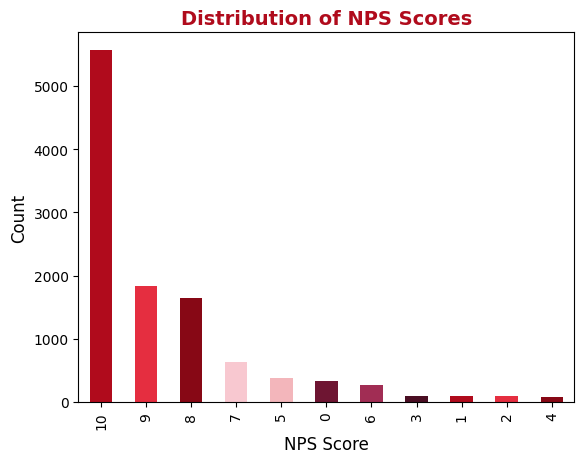

In [31]:
# Plot the chart
nps_distribution.plot(kind='bar', color=color_cycle[:len(nps_distribution)])
plt.title('Distribution of NPS Scores', fontsize=14, fontweight='bold', color='#B00B1C')  # CIBC Red for title
plt.xlabel('NPS Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# EXPLORE RELATIONSHIPS

Drop Client ID because it is only an identifier with unique variables - adding no value to identifying relationships.

In [32]:
# Drop the Client ID column
relationship_data = data.drop(columns=['Client ID'], errors='ignore')

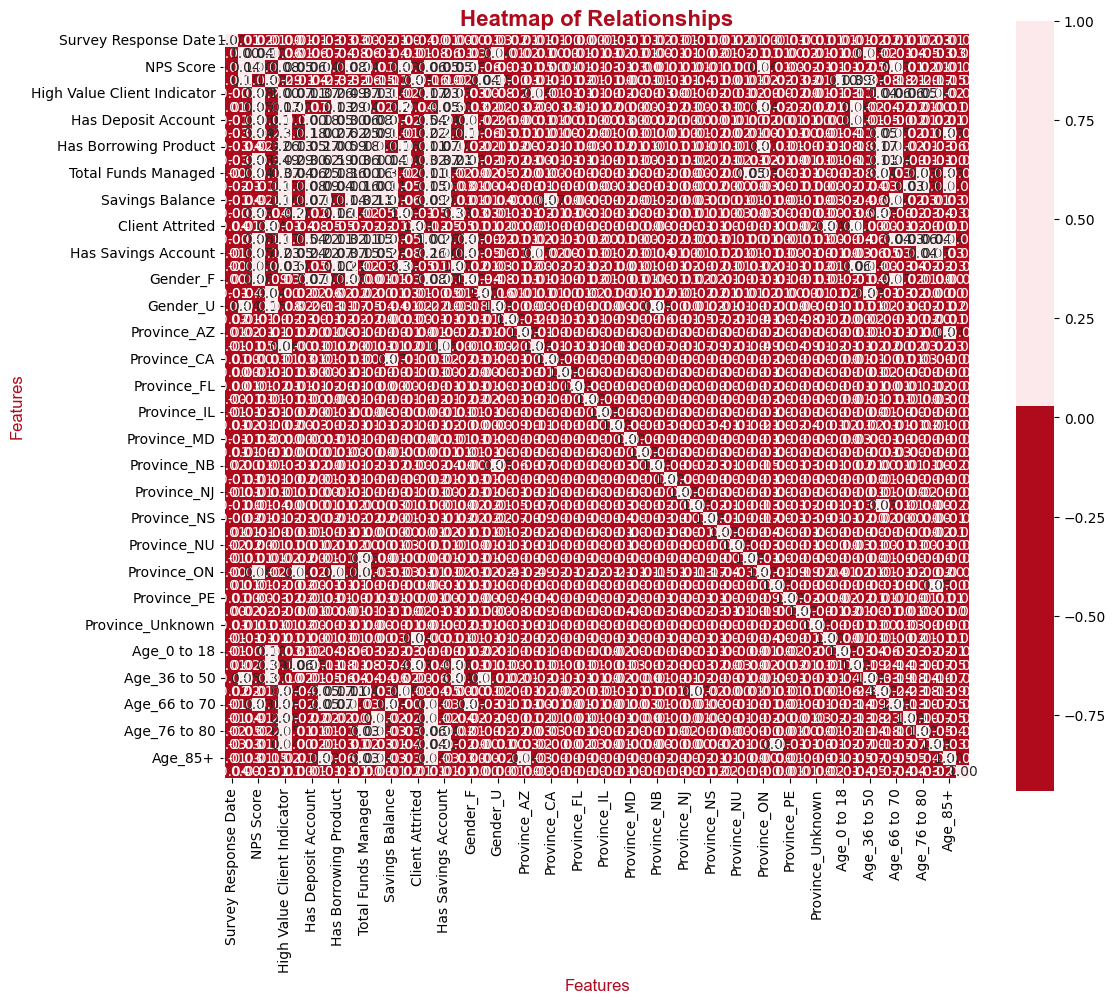

In [33]:
# Correlation matrix
correlation_matrix = relationship_data.corr()

plt.figure(figsize=(12, 10))
cibc_colors = ['#B00B1C', '#FCE9EB'] 

# Heatmap
sns.heatmap(
    correlation_matrix,
    annot=True, 
    fmt=".2f",
    cmap=sns.color_palette(cibc_colors, as_cmap=True),
    cbar=True,
    square=True
)

# Set font style
font_properties = {'fontname': 'Arial', 'fontsize': 16, 'color': '#B00B1C', 'fontweight': 'bold'}

plt.title("Heatmap of Relationships", **font_properties)
plt.xlabel("Features", fontsize=12, color='#B00B1C', fontname='Arial')
plt.ylabel("Features", fontsize=12, color='#B00B1C', fontname='Arial')


plt.show()

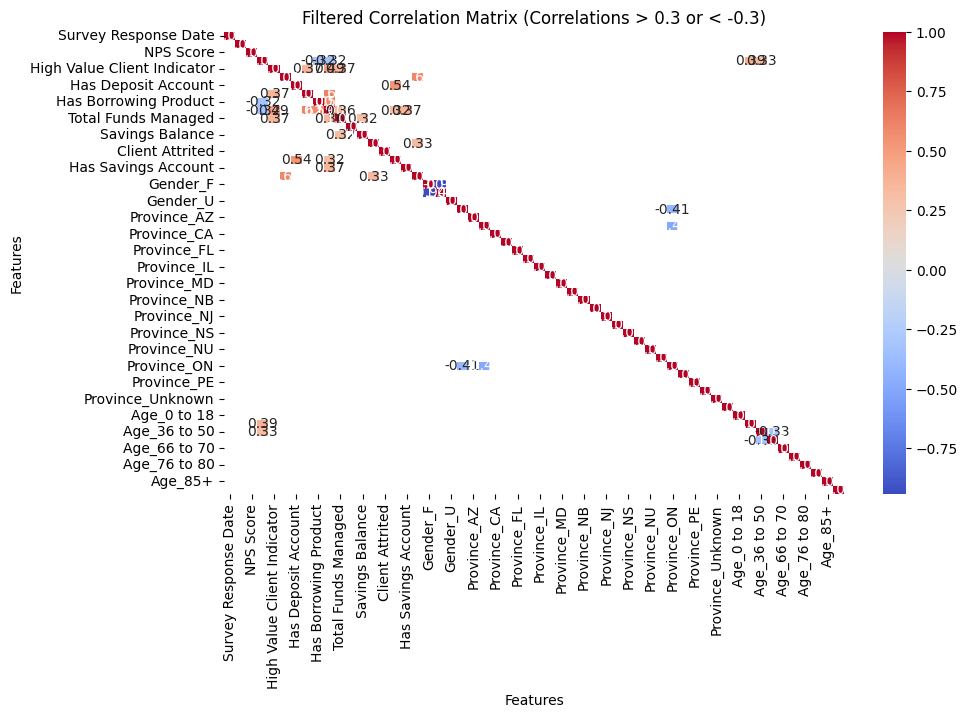

In [34]:
# Define the correlation threshold
corr_threshold = 0.3

# Filter the correlation matrix to include only values > 0.3 or < -0.3
strong_correlations = correlation_matrix[(correlation_matrix > corr_threshold) | (correlation_matrix < -corr_threshold)]

# Drop rows and columns where all values are NaN (features with no strong correlations)
filtered_corr_matrix = strong_correlations.dropna(how='all', axis=0).dropna(how='all', axis=1)

# Visualize the filtered correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Add titles and labels
plt.title('Filtered Correlation Matrix (Correlations > 0.3 or < -0.3)')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

This is not clear. We filter the columns of interest based on features with high correlation with NPS score.

In [35]:
import statsmodels.api as sm
from sklearn import linear_model as lm

In [36]:
# For the 'Client First Service Date' column
first_service_date = data['Client First Service Date'].min()
last_service_date = data['Client First Service Date'].max()

print(f"First Client Service Date: {first_service_date}")
print(f"Last Client Service Date: {last_service_date}")

# For the 'Survey Response Date' column
first_survey_date = data['Survey Response Date'].min()
last_survey_date = data['Survey Response Date'].max()

print(f"First Survey Response Date: {first_survey_date}")
print(f"Last Survey Response Date: {last_survey_date}")

First Client Service Date: 1968-01-04 00:00:00
Last Client Service Date: 2024-01-31 00:00:00
First Survey Response Date: 2023-09-20 00:00:00
Last Survey Response Date: 2024-08-28 00:00:00


In [37]:
#Create two new numerical columns to replace date columns ( Survey Response Date and Client First Service Date)

# Define the final date (October 31, 2024)
final_date = pd.to_datetime("2024-10-31")

# Calculate the length as a client (considering churn status)
def calculate_length_as_client(row):
    # If the client has churned, use the survey date; otherwise, use the final date
    end_date = row['Survey Response Date'] if row['Client Attrited'] == 1 else final_date
    return (end_date - row['Client First Service Date']).days / 365.25  # Convert to years

# Calculate the time since survey date
def calculate_time_since_survey(row):
    return (final_date - row['Survey Response Date']).days / 365.25  # Convert to years

# Apply the calculations
relationship_data['Length as Client (Years)'] = relationship_data.apply(calculate_length_as_client, axis=1)
relationship_data['Time Since Survey Date (Years)'] = relationship_data.apply(calculate_time_since_survey, axis=1)

# Display the updated DataFrame
relationship_data.head()

Survey Response Date  Survey Response Channel  NPS Score  \
0           2024-02-25                        1          0   
1           2024-01-24                        0          9   
2           2024-05-22                        0          9   
3           2023-12-08                        1         10   
4           2024-07-29                        1          8   

  Client First Service Date  High Value Client Indicator  Has Credit Card  \
0                1985-01-17                            0                0   
1                1988-01-26                            0                1   
2                2019-01-13                            0                1   
3                1998-01-03                            0                1   
4                1987-01-08                            0                1   

   Has Deposit Account  Has Investment Account  Has Borrowing Product  \
0                    1                       0                      1   
1                    1                       1                      1   
2                    1                       0                      0   
3                    1                       0                      1   
4                    1                       0                      0   

   Total Product Count  ...  Age_36 to 50  Age_51 to 65  Age_66 to 70  \
0                    4  ...             0             1             0   
1                    7  ...             0             1             0   
2                    3  ...             0             0             0   
3                    4  ...             1             0             0   
4                    4  ...             0             0             0   

   Age_71 to 75  Age_76 to 80  Age_81 to 85  Age_85+  Age_No Age  \
0             0             0             0        0           0   
1             0             0             0        0           0   
2             0             0             0        0           0   
3             0             0             0        0           0   
4             0             0             1        0           0   

   Length as Client (Years)  Time Since Survey Date (Years)  
0                 39.786448                        0.681725  
1                 36.763860                        0.769336  
2                  5.798768                        0.443532  
3                 26.825462                        0.898015  
4                 37.812457                        0.257358  

[5 rows x 58 columns]

In [38]:
# Review variables in this column to check for different lengths of time since surveys.
relationship_data['Time Since Survey Date (Years)'].describe()

count    11044.000000
mean         0.632943
std          0.297645
min          0.175222
25%          0.364134
50%          0.616016
75%          0.903491
max          1.114305
Name: Time Since Survey Date (Years), dtype: float64

In [39]:
# Exclude date columns for correlation analysis or visualizations
numeric_data = relationship_data.drop(columns=['Survey Response Date', 'Client First Service Date'])

In [40]:
# Filter columns related to NPS Score
corr_matrix = numeric_data.corr()
target_corr = corr_matrix['NPS Score'].sort_values(ascending=False)
selected_features = target_corr[target_corr.abs() > 0.2].index

# Subset the correlation matrix
filtered_corr_matrix = corr_matrix.loc[selected_features, selected_features]

In [41]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11044 entries, 0 to 11043
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Survey Response Channel         11044 non-null  int64  
 1   NPS Score                       11044 non-null  int64  
 2   High Value Client Indicator     11044 non-null  int64  
 3   Has Credit Card                 11044 non-null  int64  
 4   Has Deposit Account             11044 non-null  int64  
 5   Has Investment Account          11044 non-null  int64  
 6   Has Borrowing Product           11044 non-null  int64  
 7   Total Product Count             11044 non-null  int64  
 8   Total Funds Managed             11044 non-null  float64
 9   Chequing Balance                11044 non-null  float64
 10  Savings Balance                 11044 non-null  float64
 11  Credit Card Balance             11044 non-null  float64
 12  Client Attrited                 

C:\Users\tauny\AppData\Local\Temp\ipykernel_25360\3804665598.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=target_corr.index, x=target_corr.values, palette="Reds")


Text(0, 0.5, 'Features')

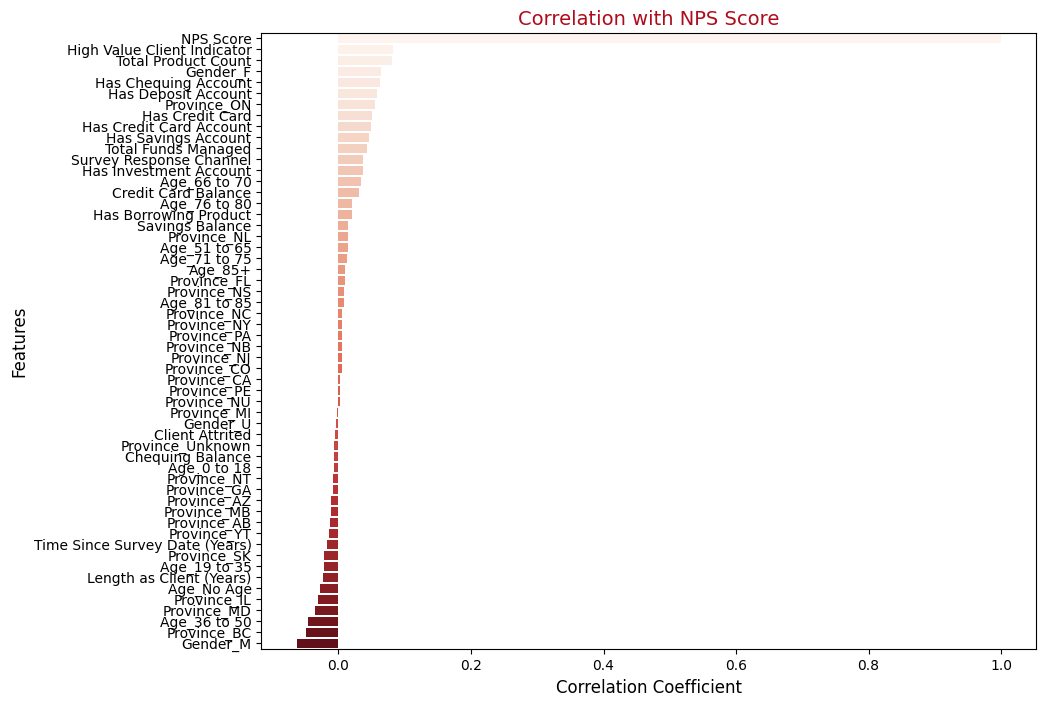

In [42]:
plt.figure(figsize=(10, 8))
sns.barplot(y=target_corr.index, x=target_corr.values, palette="Reds")
plt.title("Correlation with NPS Score", fontsize=14, color='#B00B1C')
plt.xlabel("Correlation Coefficient", fontsize=12)
plt.ylabel("Features", fontsize=12)

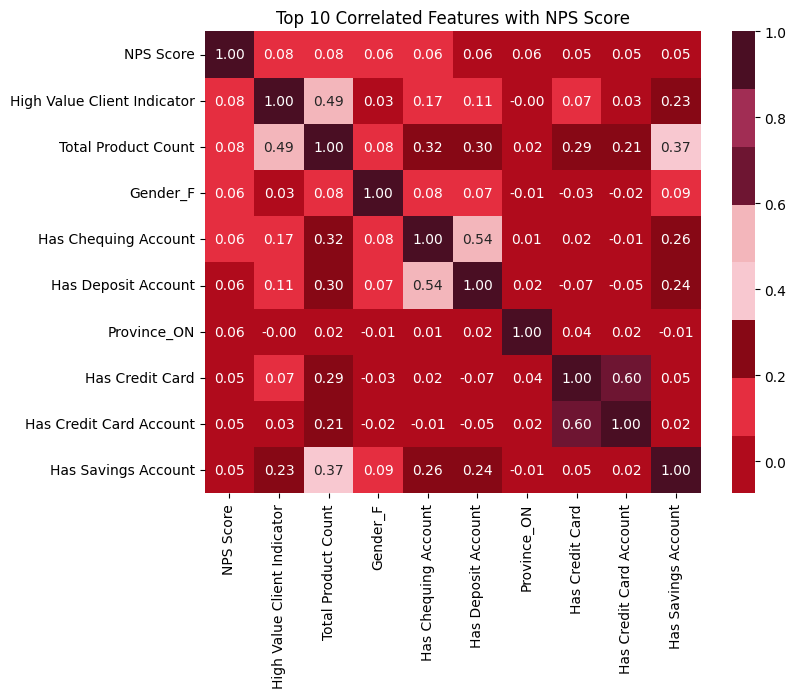

In [43]:
# Correlation matrix for top 10 correlated variables with NPS Score
corr = numeric_data.corr()['NPS Score'].sort_values(ascending=False).head(10)

# Visualize
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data[corr.index].corr(), annot=True, cmap=cibc_palette, fmt='.2f')
plt.title('Top 10 Correlated Features with NPS Score')
plt.show()

- customers with credit account have a strong correlation with NPS scores
- deposit account seem to also play a fairly strong role



In [44]:
# Define independent variables (drop irrelevant columns)
X = numeric_data.drop(columns='NPS Score')

# Define target variable (NPS Score)
y = numeric_data['NPS Score']

In [45]:
print(X.dtypes)
print(y.dtypes)

Survey Response Channel             int64
High Value Client Indicator         int64
Has Credit Card                     int64
Has Deposit Account                 int64
Has Investment Account              int64
Has Borrowing Product               int64
Total Product Count                 int64
Total Funds Managed               float64
Chequing Balance                  float64
Savings Balance                   float64
Credit Card Balance               float64
Client Attrited                     int64
Has Chequing Account                int64
Has Savings Account                 int64
Has Credit Card Account             int64
Gender_F                            int32
Gender_M                            int32
Gender_U                            int32
Province_AB                         int32
Province_AZ                         int32
Province_BC                         int32
Province_CA                         int32
Province_CO                         int32
Province_FL                       

In [46]:
# Add a constant for the intercept
Xsm = sm.add_constant(X)

# Fit the regression model
model_reg = sm.OLS(y, Xsm).fit()

# Print the summary of results
print(model_reg.summary())

                            OLS Regression Results                            
Dep. Variable:              NPS Score   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     9.836
Date:                Thu, 30 Jan 2025   Prob (F-statistic):           1.05e-74
Time:                        10:31:41   Log-Likelihood:                -24723.
No. Observations:               11044   AIC:                         4.955e+04
Df Residuals:                   10991   BIC:                         4.994e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

# NEED to check model success before looking at features effect. The model will produce influencial features even if model is terrible. So we must look at the measurements to determine the model validity - otherwise the feature output will be meaningless to the actual relationshuips that exist.

In [47]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

Mean Squared Error (MSE): 5.278052202665523
Mean Absolute Error (MAE): 1.6023140373961609
R-Squared (R²): -0.00423248258799136


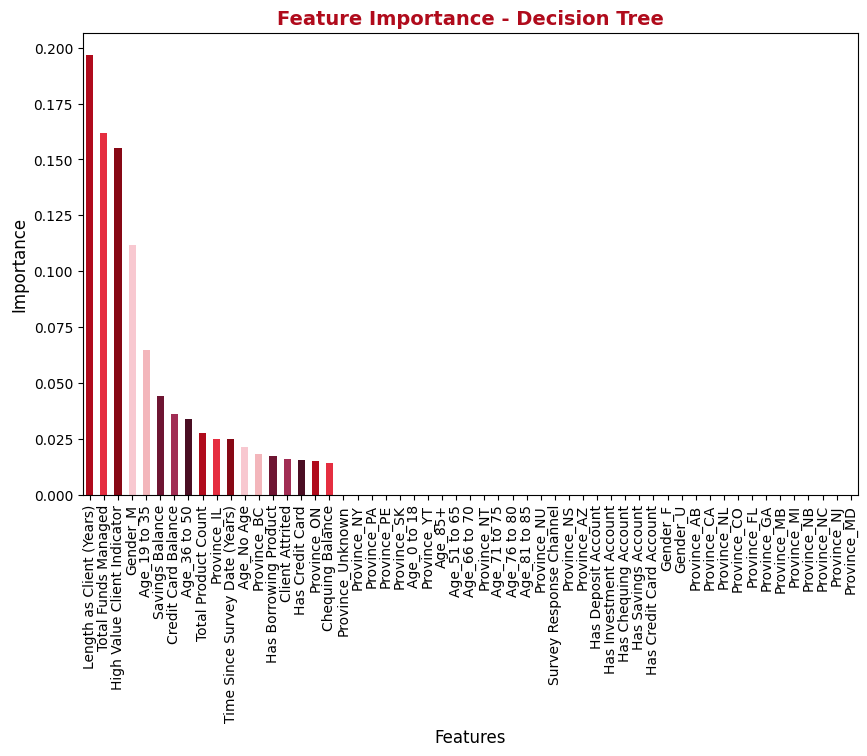

In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Train a Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42, max_depth=5)
tree_model.fit(X_train, y_train)

# Predictions from your model
y_pred = tree_model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-Squared (R²):", r2)

# Plot feature importance
importance = tree_model.feature_importances_
feature_importance = pd.Series(importance, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar', color=cibc_palette)
plt.title('Feature Importance - Decision Tree', color='#B00B1C', fontsize=14, fontweight='bold')
plt.ylabel('Importance', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.show()



In [49]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(numeric_data)

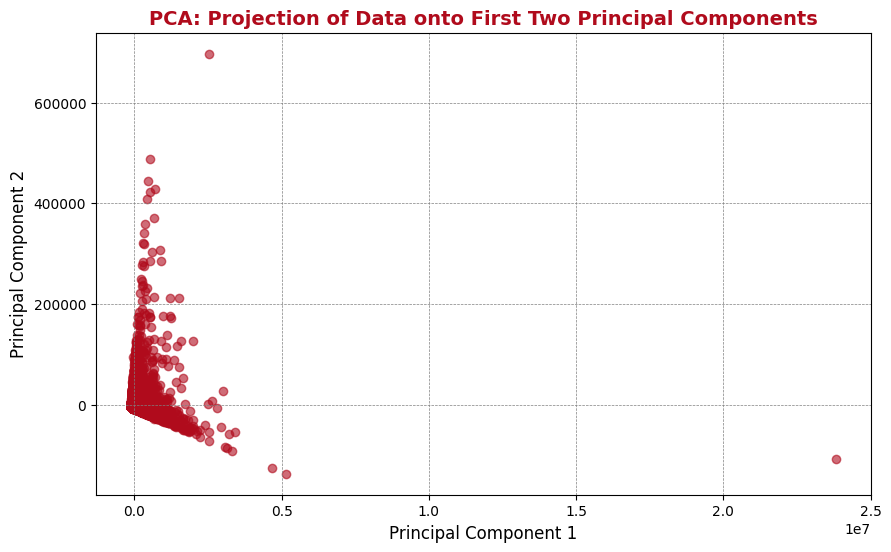

In [50]:
# Convert the principal components into a DataFrame for easier visualization
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Scatter plot of the PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], alpha=0.6, color='#B00B1C')
plt.title('PCA: Projection of Data onto First Two Principal Components', color='#B00B1C', fontsize=14, fontweight='bold')
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()

In [51]:
# Get the PCA loadings (components)
loadings = pd.DataFrame(pca.components_.T, 
                        columns=['Principal Component 1', 'Principal Component 2'],
                        index=numeric_data.columns)

# Display the loadings
print(loadings)

                                Principal Component 1  Principal Component 2
Survey Response Channel                 -8.459159e-08          -4.704281e-07
NPS Score                                2.958434e-07          -1.249835e-07
High Value Client Indicator              4.328549e-07           8.393668e-07
Has Credit Card                          4.044847e-08          -3.837643e-08
Has Deposit Account                      4.496700e-08           6.077800e-07
Has Investment Account                   3.617657e-07           5.807789e-07
Has Borrowing Product                    2.646543e-07          -8.993133e-07
Total Product Count                      2.745412e-06           3.671950e-06
Total Funds Managed                      9.996643e-01          -2.542453e-02
Chequing Balance                         9.478541e-03           1.823968e-01
Savings Balance                          2.411171e-02           9.826609e-01
Credit Card Balance                      3.020131e-04          -2.150722e-02

In [52]:
# Create a DataFrame of PCA components
pca_components = pd.DataFrame(pca.components_.T, index=numeric_data.columns, 
                              columns=[f'Principal Component {i+1}' for i in range(pca.n_components_)])

# Define a function to display top 10 positive and negative features, sorted by absolute values
def print_top_features_sorted(pca_df, component):
    sorted_features = pca_df[component].abs().sort_values(ascending=False)
    print(f"\nTop 10 features (by absolute impact) on {component}:")
    print(sorted_features.head(10))

    print(f"\nTop 10 features positively affecting {component}:")
    print(pca_df[component].loc[sorted_features.head(10).index].nlargest(10))

    print(f"\nTop 10 features negatively affecting {component}:")
    print(pca_df[component].loc[sorted_features.head(10).index].nsmallest(10))

# Print top features for each component
for component in pca_components.columns:
    print_top_features_sorted(pca_components, component)


Top 10 features (by absolute impact) on Principal Component 1:
Total Funds Managed            9.996643e-01
Savings Balance                2.411171e-02
Chequing Balance               9.478541e-03
Credit Card Balance            3.020131e-04
Length as Client (Years)       7.093763e-06
Total Product Count            2.745412e-06
High Value Client Indicator    4.328549e-07
Has Investment Account         3.617657e-07
NPS Score                      2.958434e-07
Has Borrowing Product          2.646543e-07
Name: Principal Component 1, dtype: float64

Top 10 features positively affecting Principal Component 1:
Total Funds Managed            9.996643e-01
Savings Balance                2.411171e-02
Chequing Balance               9.478541e-03
Credit Card Balance            3.020131e-04
Length as Client (Years)       7.093763e-06
Total Product Count            2.745412e-06
High Value Client Indicator    4.328549e-07
Has Investment Account         3.617657e-07
NPS Score                      2.958434

In [53]:
# Check explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by PC1: {explained_variance[0]:.2f}")
print(f"Explained variance by PC2: {explained_variance[1]:.2f}")
print(f"Total explained variance by PC1 and PC2: {explained_variance.sum():.2f}")

Explained variance by PC1: 0.99
Explained variance by PC2: 0.00
Total explained variance by PC1 and PC2: 1.00


Try on PCA scaled data and compare results.

In [54]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

In [55]:
scaled_principal_components = pca.fit_transform(scaled_data)

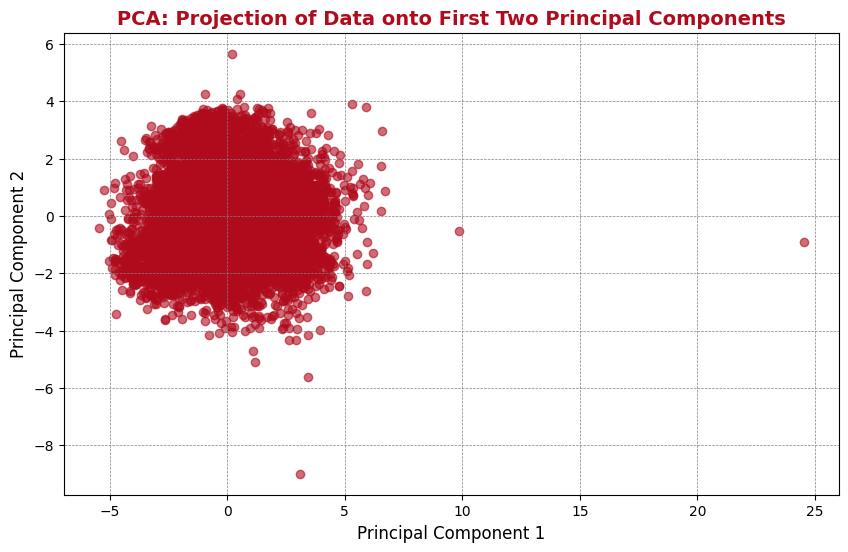

In [56]:
# Convert the principal components into a DataFrame for easier visualization
pca_df = pd.DataFrame(data=scaled_principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Scatter plot of the PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], alpha=0.6, color='#B00B1C')
plt.title('PCA: Projection of Data onto First Two Principal Components', color='#B00B1C', fontsize=14, fontweight='bold')
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()

Feature Loadings (Relationship between original features and principal components):
                                Principal Component 1  Principal Component 2
Survey Response Channel                     -0.081457              -0.001052
NPS Score                                    0.061850               0.000782
High Value Client Indicator                  0.329873              -0.030113
Has Credit Card                              0.098579              -0.402813
Has Deposit Account                          0.208413               0.140289
Has Investment Account                       0.342490               0.013452
Has Borrowing Product                        0.291269              -0.178741
Total Product Count                          0.445532              -0.158848
Total Funds Managed                          0.260040              -0.040712
Chequing Balance                             0.131705               0.058907
Savings Balance                              0.164695               0

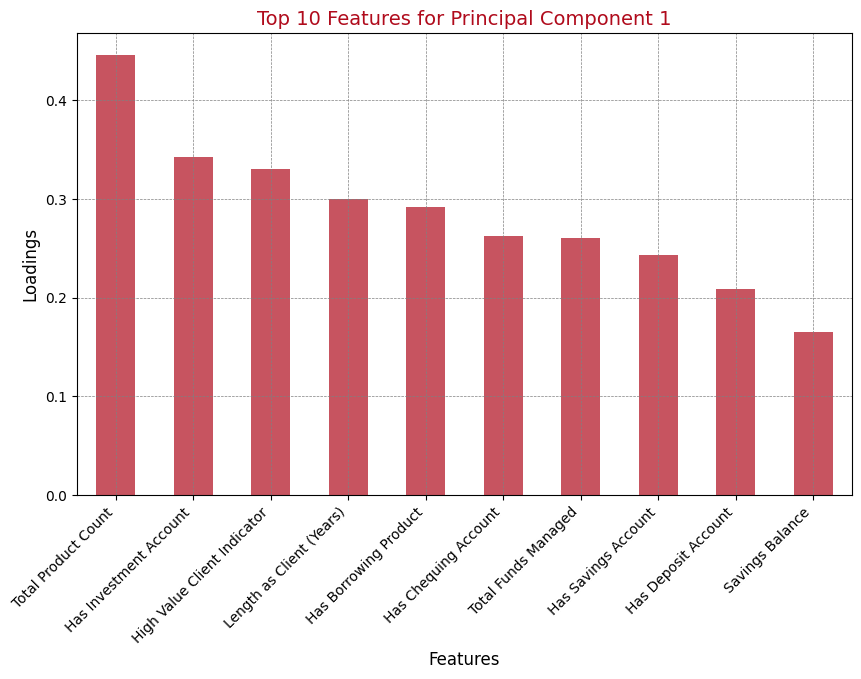

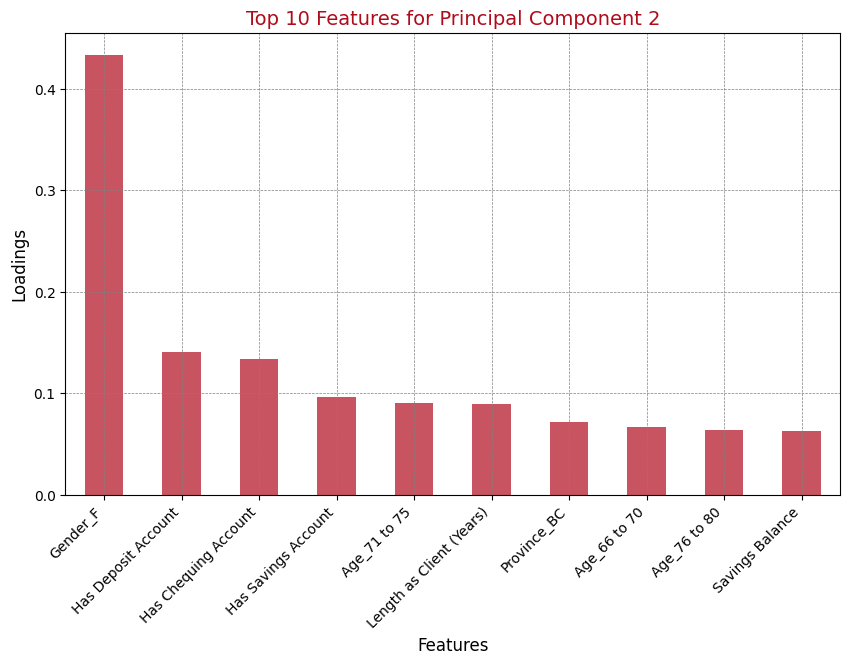

In [57]:
# Extract the loadings
loadings = pd.DataFrame(
    data=pca.components_.T,  
    index=numeric_data.columns,  # Original feature names
    columns=[f'Principal Component {i+1}' for i in range(pca.n_components_)]  # Name components
)

# Display the loadings for each principal component
print("Feature Loadings (Relationship between original features and principal components):")
print(loadings)

# Visualize the top features contributing to each component
def plot_top_loadings(loadings, component, top_n=10):
    sorted_loadings = loadings[component].sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    sorted_loadings[:top_n].plot(kind='bar', color='#B00B1C', alpha=0.7)
    plt.title(f'Top {top_n} Features for {component}', fontsize=14, color='#B00B1C')
    plt.xlabel('Features', fontsize=12)
    plt.ylabel('Loadings', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.show()

# Plot top 10 features for the first two principal components
plot_top_loadings(loadings, 'Principal Component 1', top_n=10)
plot_top_loadings(loadings, 'Principal Component 2', top_n=10)

In [58]:
# Create a DataFrame of PCA components
pca_components = pd.DataFrame(pca.components_.T, index=numeric_data.columns, 
                              columns=[f'Principal Component {i+1}' for i in range(pca.n_components_)])

# Define a function to display top 10 positive and negative features, sorted by absolute values
def print_top_features_sorted(pca_df, component):
    sorted_features = pca_df[component].abs().sort_values(ascending=False)
    print(f"\nTop 10 features (by absolute impact) on {component}:")
    print(sorted_features.head(10))

    print(f"\nTop 10 features positively affecting {component}:")
    print(pca_df[component].loc[sorted_features.head(10).index].nlargest(10))

    print(f"\nTop 10 features negatively affecting {component}:")
    print(pca_df[component].loc[sorted_features.head(10).index].nsmallest(10))

# Print top features for each component
for component in pca_components.columns:
    print_top_features_sorted(pca_components, component)


Top 10 features (by absolute impact) on Principal Component 1:
Total Product Count            0.445532
Has Investment Account         0.342490
High Value Client Indicator    0.329873
Length as Client (Years)       0.299756
Has Borrowing Product          0.291269
Has Chequing Account           0.262705
Total Funds Managed            0.260040
Has Savings Account            0.243186
Has Deposit Account            0.208413
Savings Balance                0.164695
Name: Principal Component 1, dtype: float64

Top 10 features positively affecting Principal Component 1:
Total Product Count            0.445532
Has Investment Account         0.342490
High Value Client Indicator    0.329873
Length as Client (Years)       0.299756
Has Borrowing Product          0.291269
Has Chequing Account           0.262705
Total Funds Managed            0.260040
Has Savings Account            0.243186
Has Deposit Account            0.208413
Savings Balance                0.164695
Name: Principal Component 1, dt

In [59]:
# Check explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by PC1: {explained_variance[0]:.2f}")
print(f"Explained variance by PC2: {explained_variance[1]:.2f}")
print(f"Total explained variance by PC1 and PC2: {explained_variance.sum():.2f}")

Explained variance by PC1: 0.06
Explained variance by PC2: 0.04
Total explained variance by PC1 and PC2: 0.10


Scaled data is showing results less representative of the relationship between featuers and their variances.

In [60]:
# Apply PCA and reduce to 3 components
pca = PCA(n_components=3)
pca_components = pca.fit_transform(numeric_data)

# Create a new DataFrame with the PCA results
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2', 'PC3'])

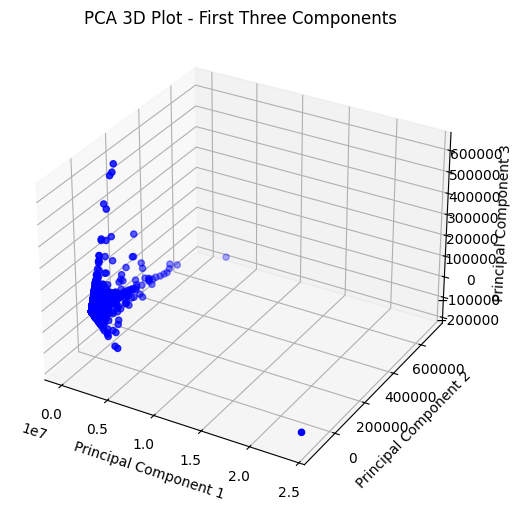

In [61]:
# Create a 3D plot of the three components
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3 components
ax.scatter(pca_components[:, 0], pca_components[:, 1], pca_components[:, 2], c='b', marker='o')

# Add labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('PCA 3D Plot - First Three Components')

plt.show()

In [62]:
# Check explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by PC1: {explained_variance[0]:.2f}")
print(f"Explained variance by PC2: {explained_variance[1]:.2f}")
print(f"Explained variance by PC3: {explained_variance[2]:.2f}")
print(f"Total explained variance by PC1, PC2, and PCA3: {explained_variance.sum():.2f}")

Explained variance by PC1: 0.99
Explained variance by PC2: 0.00
Explained variance by PC3: 0.00
Total explained variance by PC1, PC2, and PCA3: 1.00


Explained variance by Principal Component 1: 0.06
Explained variance by Principal Component 2: 0.04
Explained variance by Principal Component 3: 0.03
Explained variance by Principal Component 4: 0.03
Explained variance by Principal Component 5: 0.03
Explained variance by Principal Component 6: 0.02
Explained variance by Principal Component 7: 0.02
Explained variance by Principal Component 8: 0.02
Total explained variance by the first 8 components: 0.27


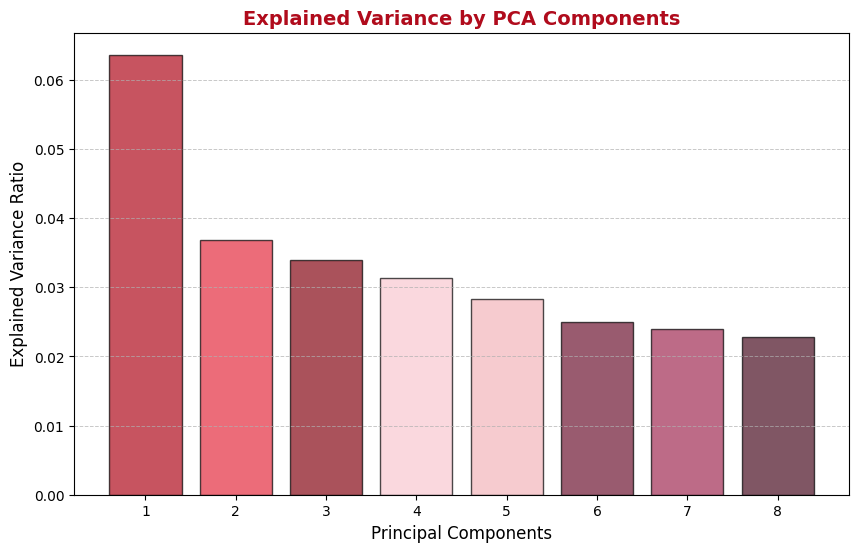


PCA Components:
   Principal Component 1  Principal Component 2  Principal Component 3  \
0              -0.571728               2.090414               0.107433   
1               2.063313               1.541268              -0.449692   
2              -1.725781               0.300519              -1.695969   
3              -0.461172              -0.370184              -1.851397   
4              -0.978068              -0.440015               1.068938   

   Principal Component 4  Principal Component 5  Principal Component 6  \
0              -1.451439               2.041293               1.963455   
1              -0.828463              -0.845805               1.071482   
2               1.599857              -1.099931              -0.044052   
3               1.061029               0.985092               0.407971   
4              -0.907841              -1.016122              -1.168925   

   Principal Component 7  Principal Component 8  
0              -0.447493              -0.38

In [63]:
# Perform PCA, keeping 8 components
pca = PCA(n_components=8)
pca_components = pca.fit_transform(scaled_data)

# Create a DataFrame for the PCA components
pca_df = pd.DataFrame(data=pca_components, columns=[f'Principal Component {i+1}' for i in range(8)])

# Print explained variance for the first 8 components
explained_variance = pca.explained_variance_ratio_
for i, variance in enumerate(explained_variance, start=1):
    print(f'Explained variance by Principal Component {i}: {variance:.2f}')

# Total explained variance
total_explained_variance = np.sum(explained_variance)
print(f'Total explained variance by the first 8 components: {total_explained_variance:.2f}')

# Visualize the explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, 9), explained_variance, alpha=0.7, color=cibc_palette, edgecolor='black')
plt.title('Explained Variance by PCA Components', fontsize=14, fontweight='bold', color='#B00B1C')
plt.xlabel('Principal Components', fontsize=12)
plt.ylabel('Explained Variance Ratio', fontsize=12)
plt.xticks(range(1, 9))
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.show()

# Output the PCA components
print("\nPCA Components:")
print(pca_df.head())

PCA desn't capture enough of the varuation, only 27% of the total variance is captured within the first 8 components.

# Second run shows the first PCA component captures nearly all of the variance? - this seems wrong - maybe recheck data.

In [64]:
# Second run shows the first PCA component captures nearly all of the variance? - this seems wrong - maybe recheck data.

We try a random forest model because it can captures non-linear relationships.

Mean Squared Error (MSE): 5.397317157084655
Mean Absolute Error (MAE): 1.6648709823449523
R-Squared (R²): -0.026924516820161726


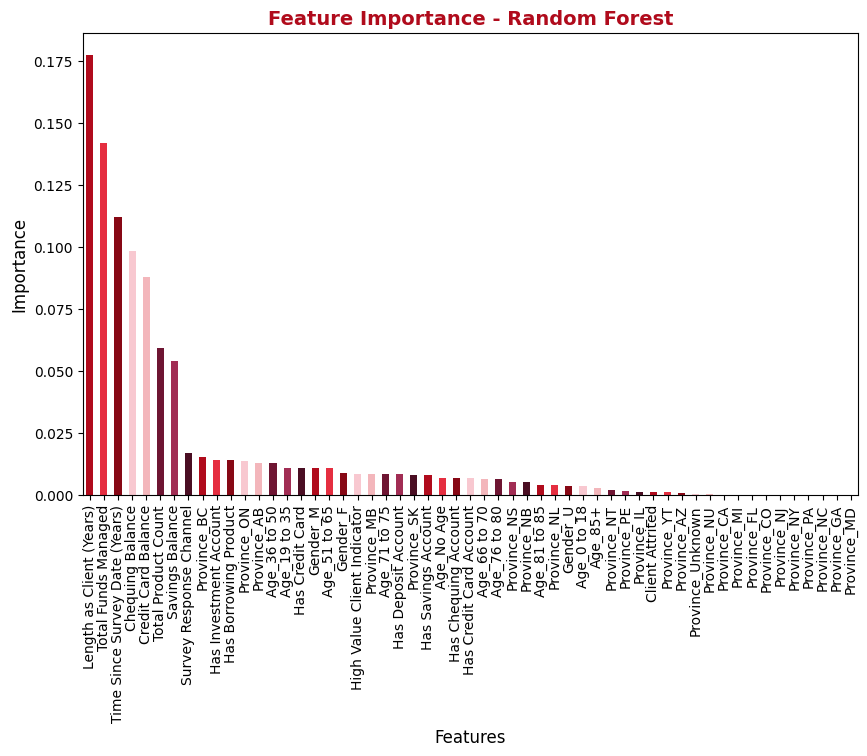

In [65]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions from your model
y_pred = rf_model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-Squared (R²):", r2)

# Plot feature importance
importance = rf_model.feature_importances_
feature_importance = pd.Series(importance, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar', color=cibc_palette)
plt.title('Feature Importance - Random Forest', color='#B00B1C', fontsize=14, fontweight='bold')
plt.ylabel('Importance', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.show()

THIS DOESNT HELP beause the rf model performs poorly (below).

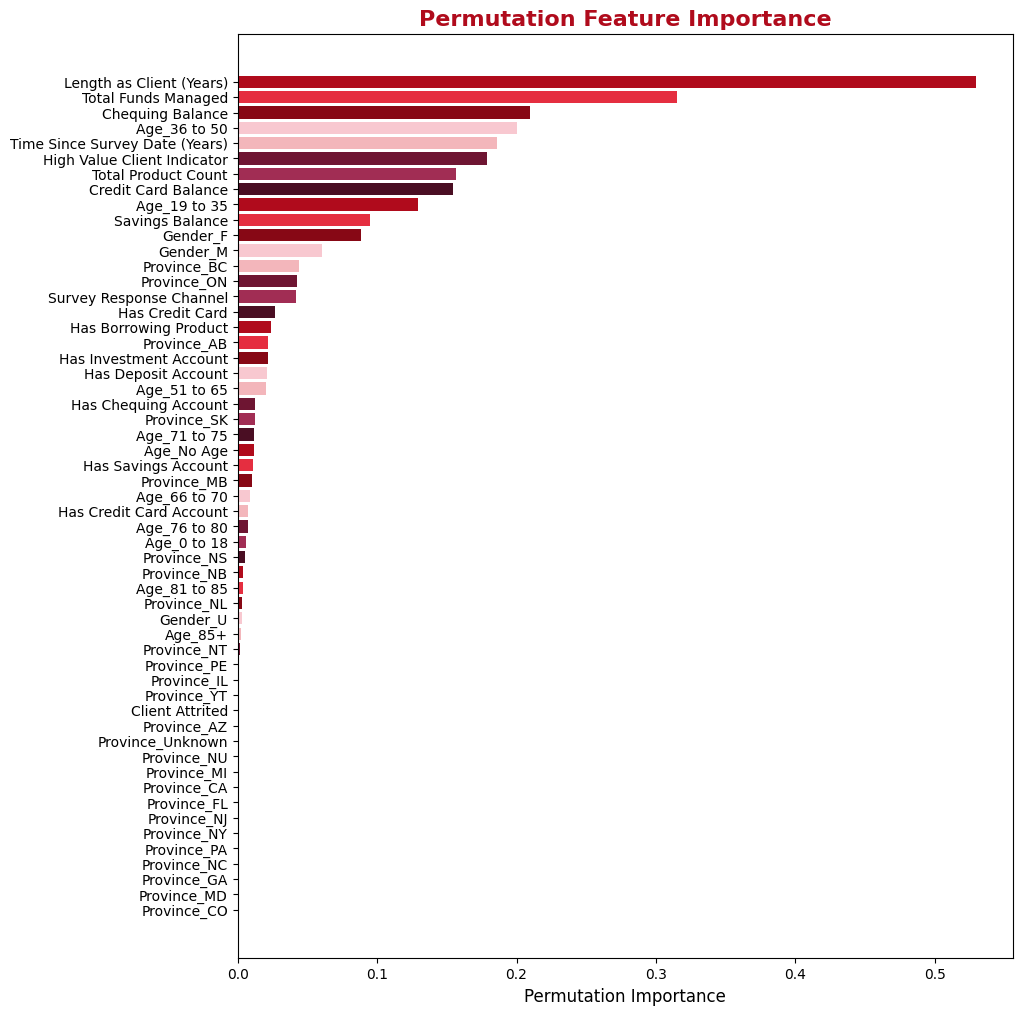

In [66]:
# DETERMINE FEATURES FROM RF MODEL

from sklearn.inspection import permutation_importance

# Perform permutation importance
perm_importance = permutation_importance(rf_model, X, y, n_repeats=10, random_state=42)


importance_df = pd.DataFrame({
    'Feature': X.columns,  # Extract feature names from X
    'Importance': perm_importance.importances_mean
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 12))  # Adjust figure size for better readability
plt.barh(importance_df['Feature'], importance_df['Importance'], color=cibc_palette)
plt.title('Permutation Feature Importance', fontsize=16, fontweight='bold', color='#B00B1C')
plt.xlabel('Permutation Importance', fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.show()

In [67]:
# Convert NumPy array to Pandas DataFrame
scaled_data = pd.DataFrame(numeric_data)

In [68]:
# Define independent variables (drop irrelevant columns)
X_scaled = scaled_data.drop(columns='NPS Score')

# Define target variable (NPS Score)
y_scaled = scaled_data['NPS Score']

In [69]:
# Split the data into training and testing sets (80% train, 20% test)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42, shuffle=True)

Mean Squared Error (MSE): 5.2495323585027975
Mean Absolute Error (MAE): 1.610808147049271
R-Squared (R²): 0.0011938665284670913


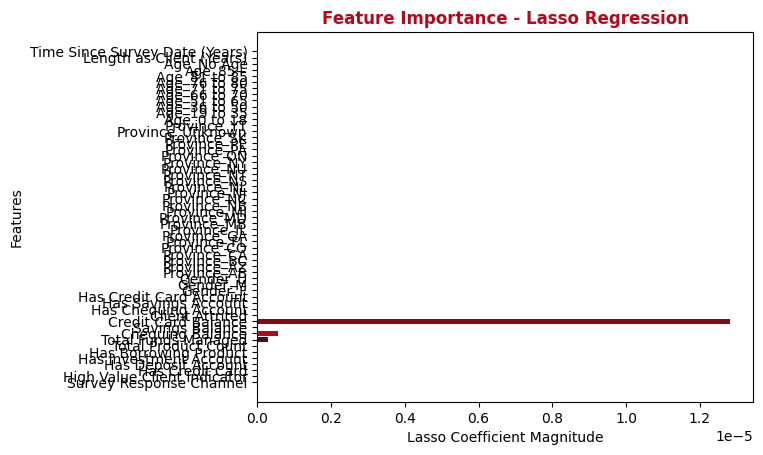

In [70]:
from sklearn.linear_model import LassoCV

# Fit Lasso model
lasso_model = LassoCV(cv=5, random_state=42).fit(X_train_scaled, y_train_scaled)

# Predictions from your model
y_pred_scaled = lasso_model.predict(X_test_scaled)

# Evaluation metrics
mse = mean_squared_error(y_test_scaled, y_pred_scaled)
mae = mean_absolute_error(y_test_scaled, y_pred_scaled)
r2 = r2_score(y_test_scaled, y_pred_scaled)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-Squared (R²):", r2)

# Plot feature importance
plt.barh(X.columns, np.abs(lasso_model.coef_), color=cibc_palette)
plt.xlabel('Lasso Coefficient Magnitude')
plt.ylabel('Features')
plt.title('Feature Importance - Lasso Regression', color='#B00B1C', fontweight='bold')
plt.show()

Poor results

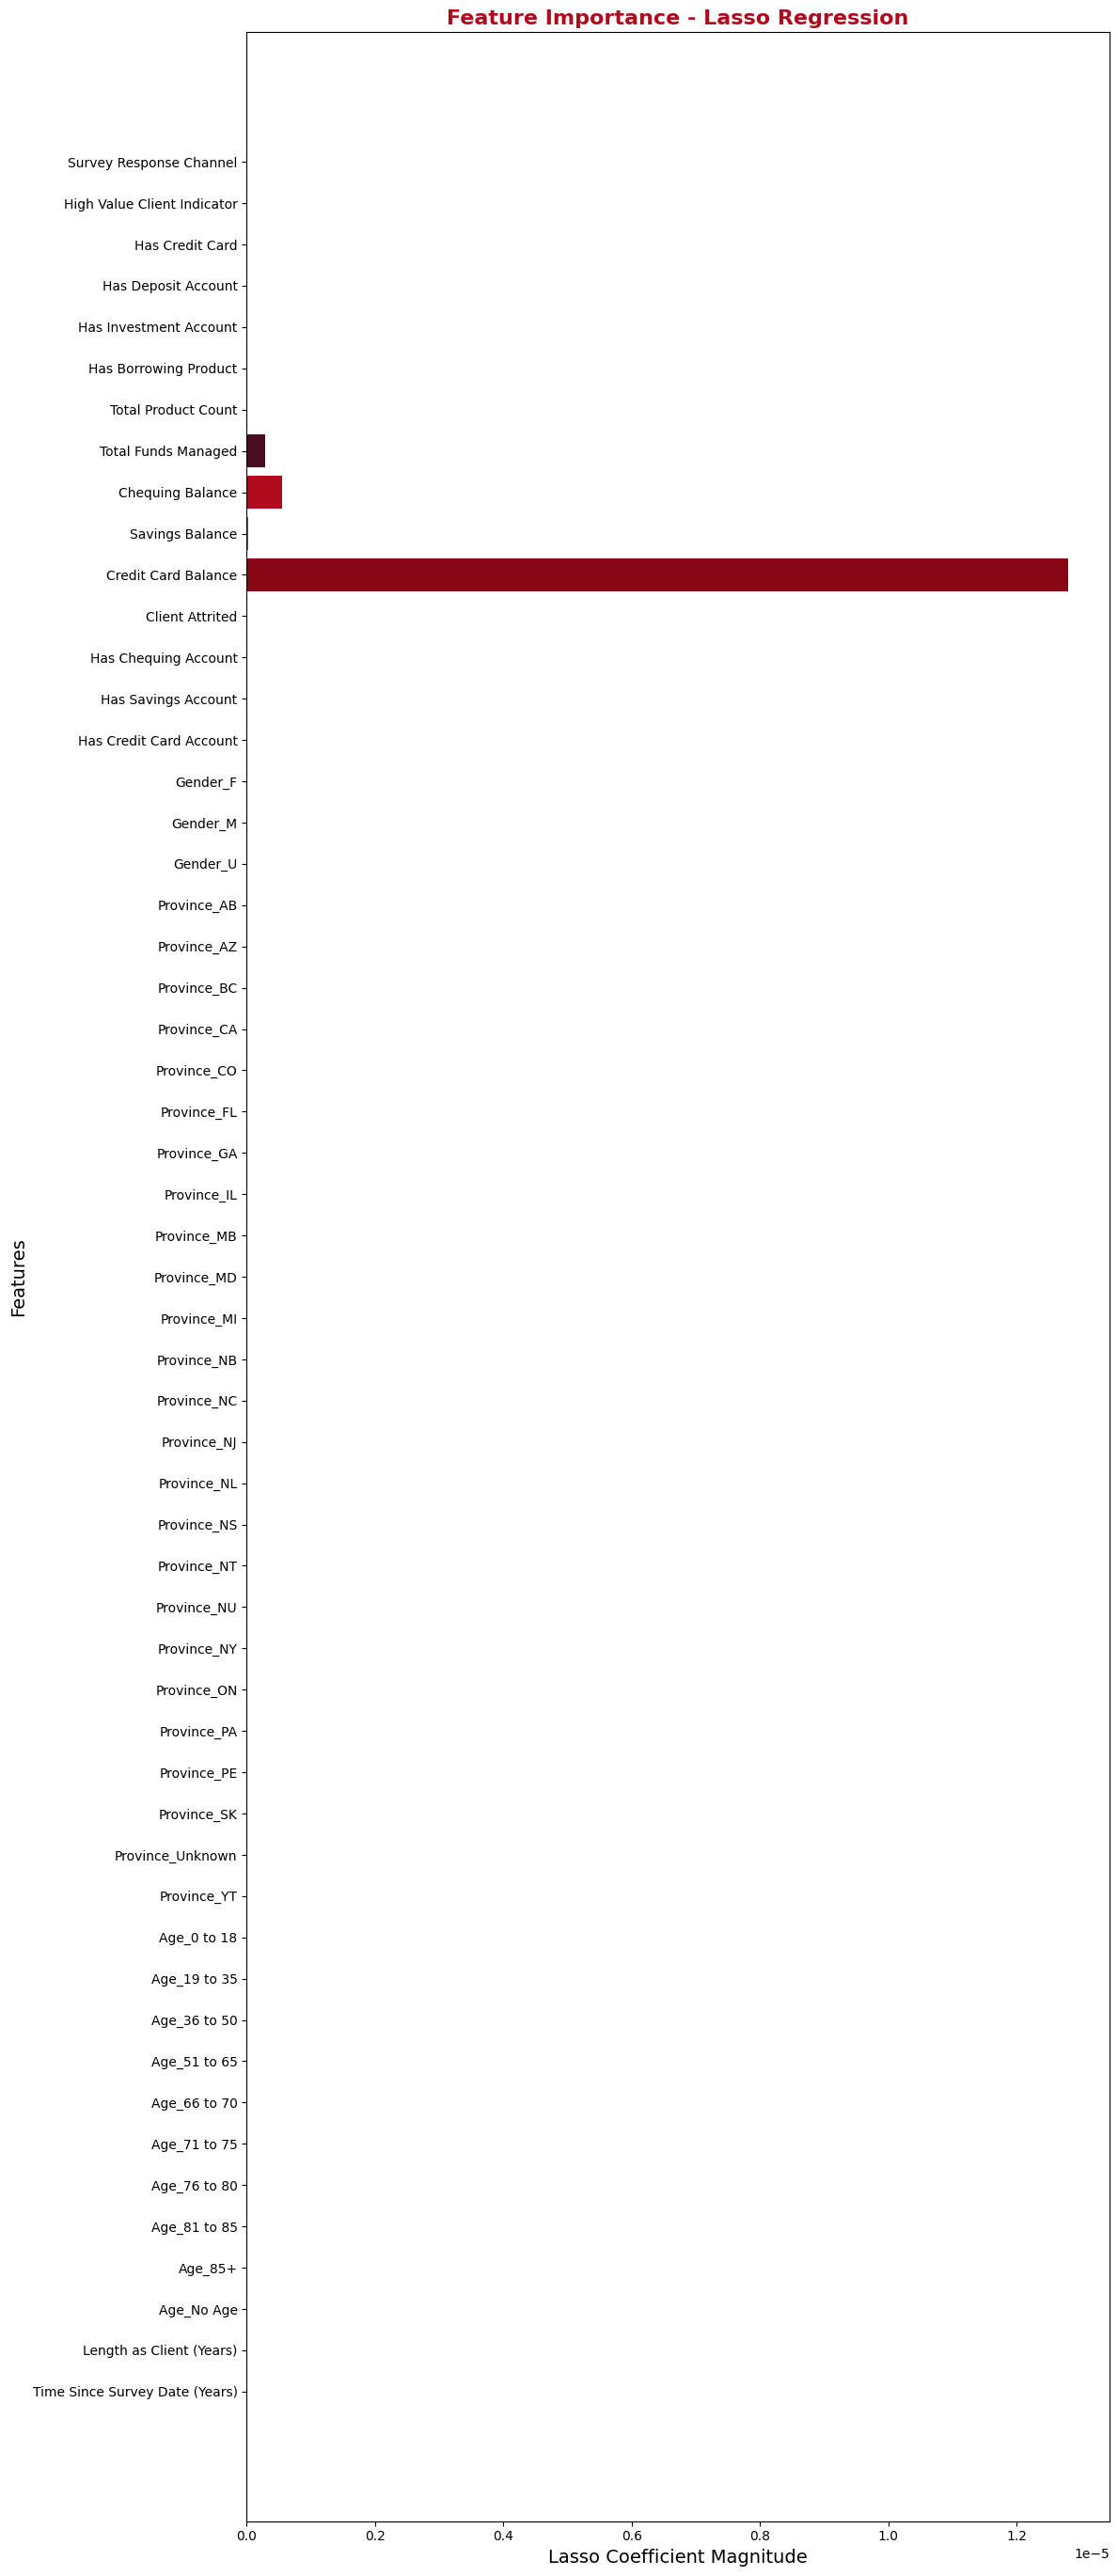

In [71]:
# Adjust figure size dynamically for better readability
plt.figure(figsize=(12, len(X.columns) / 2))

# Plot feature importance
plt.barh(X.columns, np.abs(lasso_model.coef_), color=cibc_palette)
plt.xlabel('Lasso Coefficient Magnitude', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Feature Importance - Lasso Regression', color='#B00B1C', fontweight='bold', fontsize=16)

# Invert y-axis to show the most important features on top
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

In [72]:
print(numeric_data[['Length as Client (Years)', 'NPS Score']].corr())

                          Length as Client (Years)  NPS Score
Length as Client (Years)                  1.000000  -0.023193
NPS Score                                -0.023193   1.000000


In [73]:
# Calculate the correlation
print(scaled_data[['Credit Card Balance', 'NPS Score']].corr())

                     Credit Card Balance  NPS Score
Credit Card Balance             1.000000   0.031487
NPS Score                       0.031487   1.000000


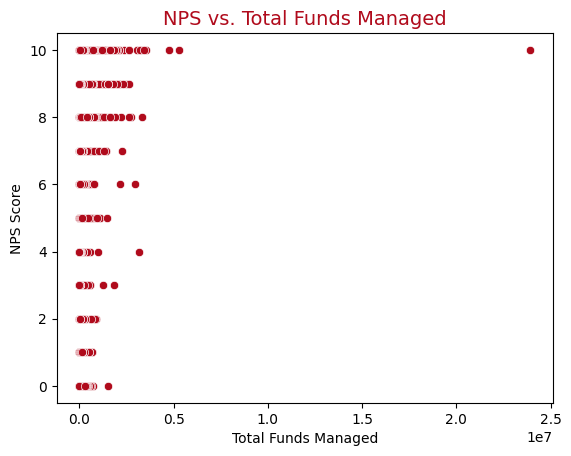

In [74]:
sns.scatterplot(data=numeric_data, x='Total Funds Managed', y='NPS Score', color='#B00B1C')
plt.title('NPS vs. Total Funds Managed', fontsize=14, color='#B00B1C')
plt.xlabel('Total Funds Managed')
plt.ylabel('NPS Score')
plt.show()

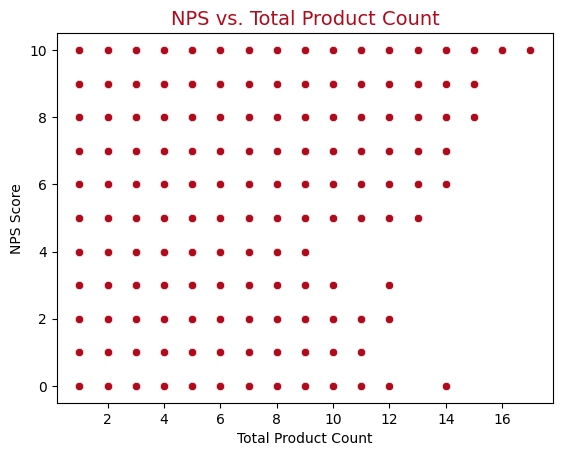

In [75]:
sns.scatterplot(data=scaled_data, x='Total Product Count', y='NPS Score', color='#B00B1C')
plt.title('NPS vs. Total Product Count', fontsize=14, color='#B00B1C')
plt.xlabel('Total Product Count')
plt.ylabel('NPS Score')
plt.show()

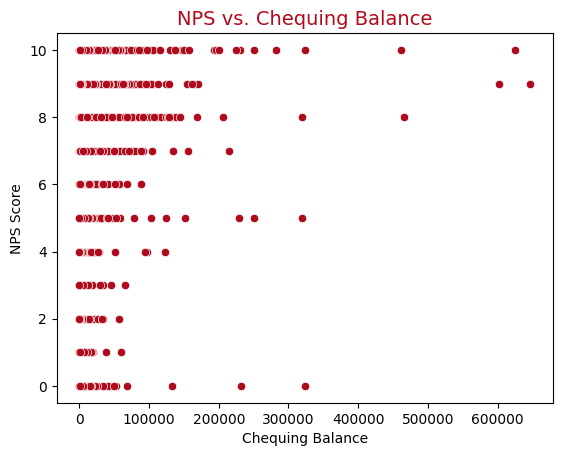

In [76]:
sns.scatterplot(data=numeric_data, x='Chequing Balance', y='NPS Score', color='#B00B1C')
plt.title('NPS vs. Chequing Balance', fontsize=14, color='#B00B1C')
plt.xlabel('Chequing Balance')
plt.ylabel('NPS Score')
plt.show()

In [77]:
'plot_tree'

'plot_tree'

Mean Squared Error (MSE): 5.3307
Mean Absolute Error (MAE): 1.6220
R-Squared (R²): 0.0113
Cross-Validation R-Squared Scores: [-0.01401045  0.00761312  0.00799964  0.00705035  0.00533844]
Mean Cross-Validation R-Squared: 0.0028


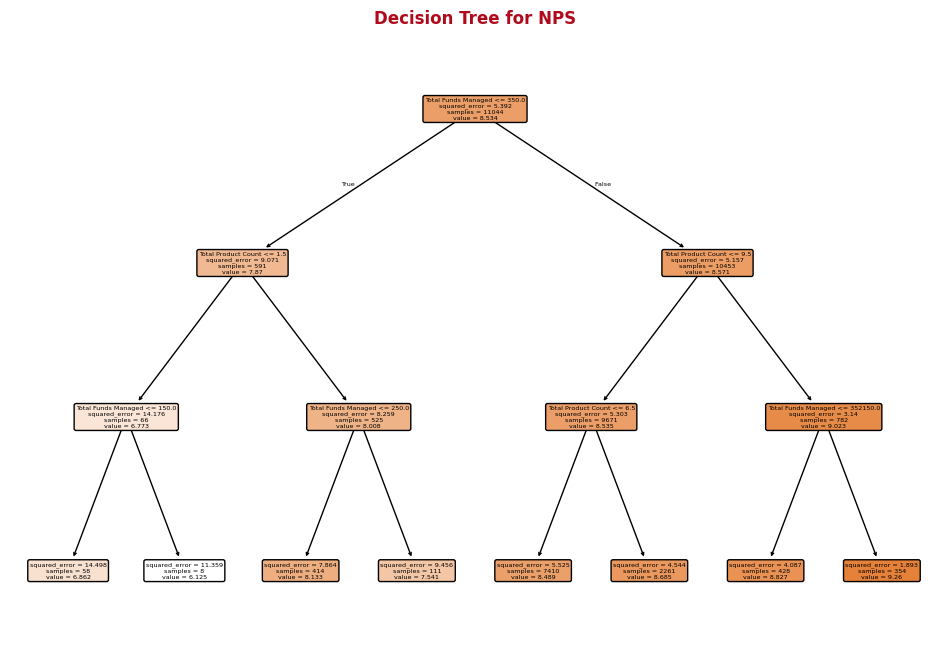

In [78]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree


# Fit Decision Tree
tree = DecisionTreeRegressor(max_depth=3, random_state=42)
tree.fit(X[['Total Funds Managed', 'Total Product Count']], y)

# Predictions
y_pred = tree.predict(X[['Total Funds Managed', 'Total Product Count']])

# Calculate evaluation metrics
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-Squared (R²): {r2:.4f}")

# Cross-validation score
cross_val_r2 = cross_val_score(tree, X[['Total Funds Managed', 'Total Product Count']], y, cv=5, scoring='r2')
print(f"Cross-Validation R-Squared Scores: {cross_val_r2}")
print(f"Mean Cross-Validation R-Squared: {np.mean(cross_val_r2):.4f}")

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=['Total Funds Managed', 'Total Product Count'], filled=True, rounded=True)
plt.title('Decision Tree for NPS', color='#B00B1C', fontweight='bold')
plt.show()

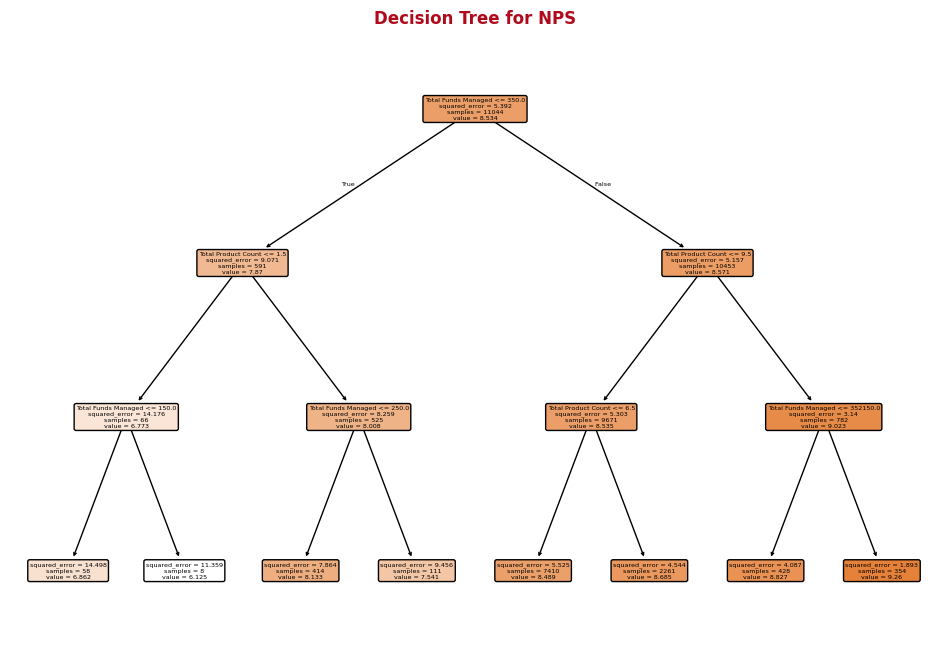

In [79]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Fit Decision Tree
tree = DecisionTreeRegressor(max_depth=3, random_state=42)
tree.fit(X[['Total Funds Managed', 'Total Product Count']], y)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=['Total Funds Managed', 'Total Product Count'], filled=True, rounded=True)
plt.title('Decision Tree for NPS', color='#B00B1C', fontweight='bold')
plt.show()

C:\Users\tauny\AppData\Local\Temp\ipykernel_25360\1428931568.py:9: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(


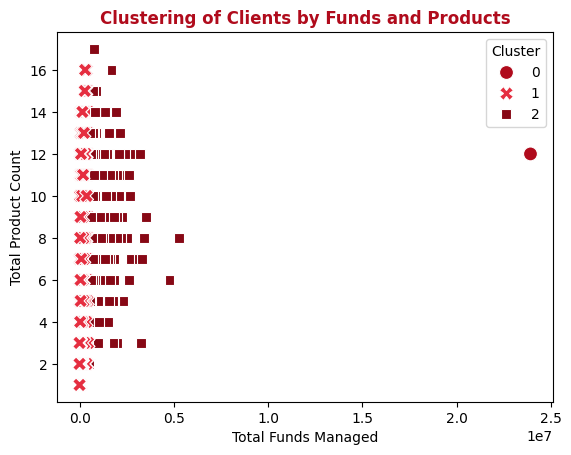

Cluster
0    10.000000
1     8.508175
2     8.944186
Name: NPS Score, dtype: float64


In [80]:
from sklearn.cluster import KMeans
import seaborn as sns

# Fit K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
numeric_data['Cluster'] = kmeans.fit_predict(X[['Total Funds Managed', 'Total Product Count']])

# Visualize clusters
sns.scatterplot(
    data=numeric_data,
    x='Total Funds Managed',
    y='Total Product Count',
    hue='Cluster',
    palette=cibc_palette,
    style='Cluster',
    s=100
)
plt.title('Clustering of Clients by Funds and Products', color='#B00B1C', fontweight='bold')
plt.xlabel('Total Funds Managed')
plt.ylabel('Total Product Count')
plt.show()

# Compare NPS by cluster
print(numeric_data.groupby('Cluster')['NPS Score'].mean())

Clusters are not clear here.

C:\Users\tauny\AppData\Local\Temp\ipykernel_25360\2049644331.py:9: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(


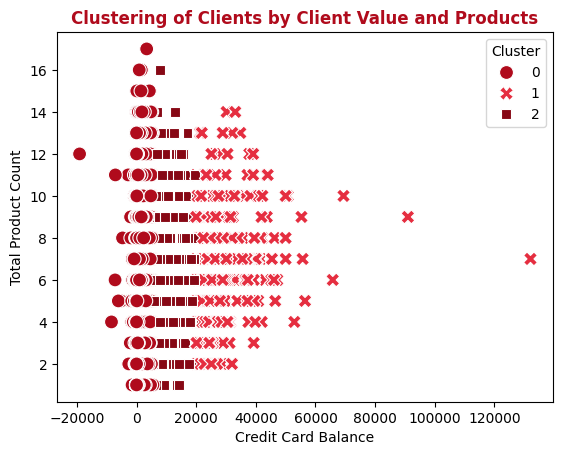

Cluster
0    8.506904
1    8.781711
2    8.684716
Name: NPS Score, dtype: float64


In [81]:
from sklearn.cluster import KMeans
import seaborn as sns

# Fit K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
numeric_data['Cluster'] = kmeans.fit_predict(X[['Credit Card Balance', 'Total Product Count']])

# Visualize clusters
sns.scatterplot(
    data=numeric_data,
    x='Credit Card Balance',
    y='Total Product Count',
    hue='Cluster',
    palette=cibc_palette,
    style='Cluster',
    s=100
)
plt.title('Clustering of Clients by Client Value and Products', color='#B00B1C', fontweight='bold')
plt.xlabel('Credit Card Balance')
plt.ylabel('Total Product Count')
plt.show()

# Compare NPS by cluster
print(numeric_data.groupby('Cluster')['NPS Score'].mean())

C:\Users\tauny\AppData\Local\Temp\ipykernel_25360\1267177655.py:8: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.scatterplot(


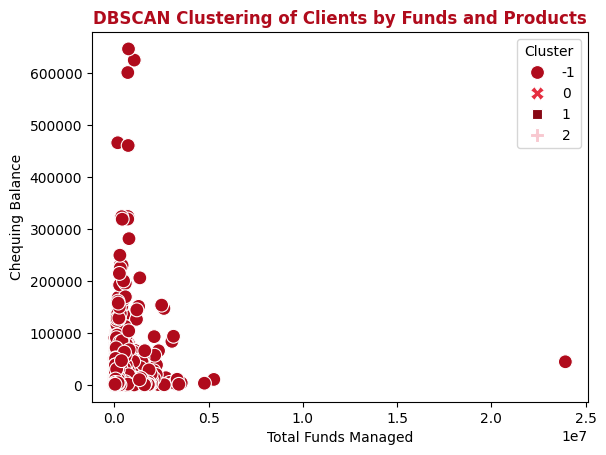

In [82]:
# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
# - since there are outliers lets check this model out
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=50)
scaled_data['Cluster'] = dbscan.fit_predict(X_scaled[['Total Funds Managed', 'Chequing Balance']])

sns.scatterplot(
    data=scaled_data,
    x='Total Funds Managed',
    y='Chequing Balance',
    hue='Cluster',
    palette=cibc_palette,
    style='Cluster',
    s=100
)
plt.title('DBSCAN Clustering of Clients by Funds and Products', color='#B00B1C', fontweight='bold')
plt.xlabel('Total Funds Managed')
plt.ylabel('Chequing Balance')
plt.show()


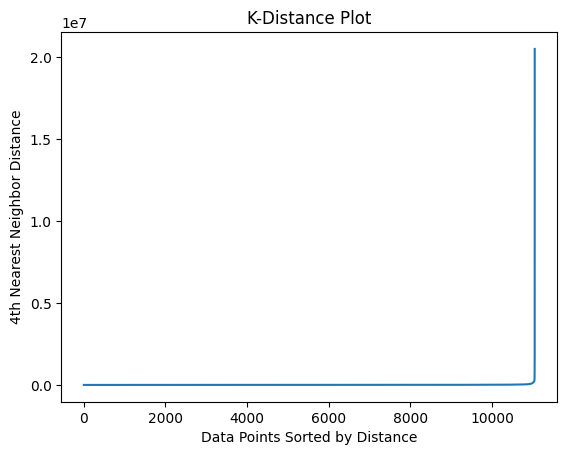

In [83]:
#  elbow point in the plot to determine the optimal eps
 
from sklearn.neighbors import NearestNeighbors
import numpy as np

neighbors = NearestNeighbors(n_neighbors=15)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances[:, 4])

plt.plot(distances)
plt.title('K-Distance Plot')
plt.xlabel('Data Points Sorted by Distance')
plt.ylabel('4th Nearest Neighbor Distance')
plt.show()

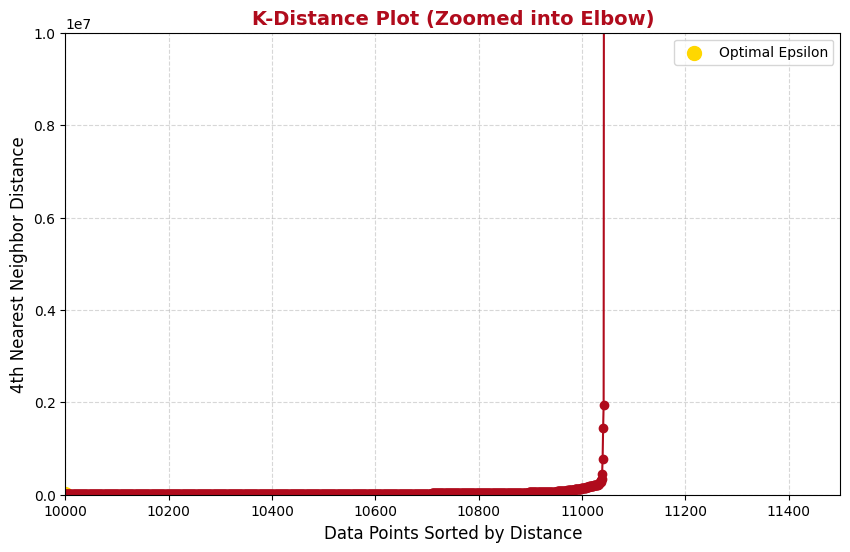

In [84]:
# Adjust the Plot to Zoom into the Elbow Point


  # Replace with your distance values
indices = range(len(distances))

# Plot with zoom into the elbow region
plt.figure(figsize=(10, 6))
plt.plot(indices, distances, marker='o', linestyle='-', color='#B00B1C')
plt.title('K-Distance Plot (Zoomed into Elbow)', fontsize=14, fontweight='bold', color='#B00B1C')
plt.xlabel('Data Points Sorted by Distance', fontsize=12)
plt.ylabel('4th Nearest Neighbor Distance', fontsize=12)

# Zoom into the elbow region
plt.xlim(10000, 11500)  # Adjust these limits based on where the elbow appears
plt.ylim(0, 1e7)  # Adjust this range if necessary to focus on the elbow

# Highlight the elbow point manually (adjust the index if known)
optimal_index = 10000  # Replace with the approximate elbow point index
plt.scatter(optimal_index, distances[optimal_index], color='gold', s=100, label='Optimal Epsilon')
plt.legend()

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

C:\Users\tauny\AppData\Local\Temp\ipykernel_25360\2417242540.py:4: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.scatterplot(


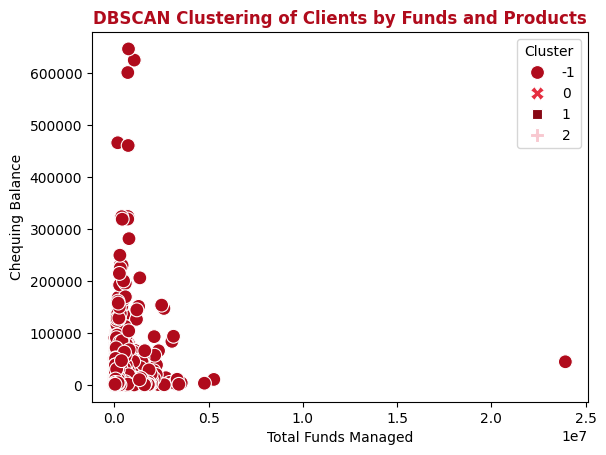

In [85]:
dbscan = DBSCAN(eps=0.2, min_samples=50)
scaled_data['Cluster'] = dbscan.fit_predict(X_scaled[['Total Funds Managed', 'Chequing Balance']])

sns.scatterplot(
    data=scaled_data,
    x='Total Funds Managed',
    y='Chequing Balance',
    hue='Cluster',
    palette=cibc_palette,
    style='Cluster',
    s=100
)
plt.title('DBSCAN Clustering of Clients by Funds and Products', color='#B00B1C', fontweight='bold')
plt.xlabel('Total Funds Managed')
plt.ylabel('Chequing Balance')
plt.show()

In [86]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib.colors import ListedColormap

In [87]:
# We use the elbow method to determine the most appropriate number of clusters.
k_values = range(1, 11)  # Testing k from 1 to 10
sse = [KMeans(n_clusters=k, random_state=42).fit(scaled_data).inertia_ for k in k_values]

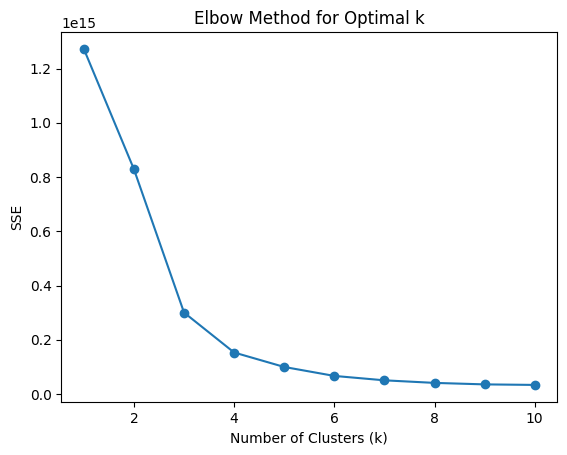

In [88]:
plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.show()

In [89]:
# 3 appers to be optimal, but we try and compare three different amounts along the bend.
# The k values we want to try
k_values = [3, 4, 5]

# Loop through each k value, fit K-Means, and print the Silhouette Score
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    print(f'For k={k}, Silhouette Score: {score:.4f}')

For k=3, Silhouette Score: 0.8417
For k=4, Silhouette Score: 0.7979
For k=5, Silhouette Score: 0.7685


3 Appears to be optimal

In [90]:
    '#B00B1C', '#E52E40', '#870815',  # Signature Red and Variations
    '#F8C8D0', '#F3B6BB',  # Soft Pink and Variations
    '#6E1532', '#A12D54', '#4A0E23',  # Dark Burgundy and Variations

('#6E1532', '#A12D54', '#4A0E23')

In [91]:

c_colors = ListedColormap(['#B00B1C', '#F8C8D0', '#6E1532', '#870815', '#4A0E23']) 

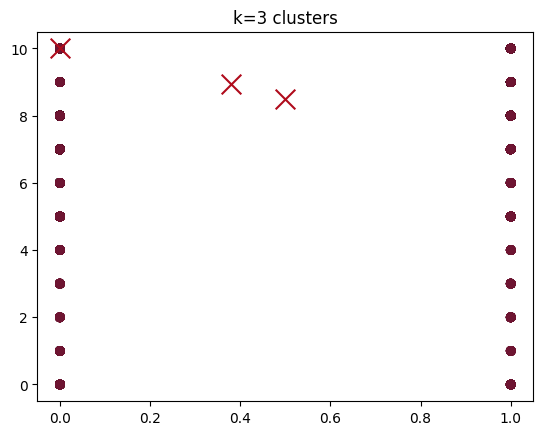

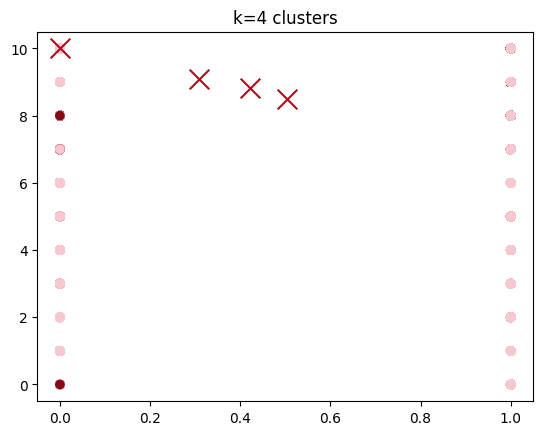

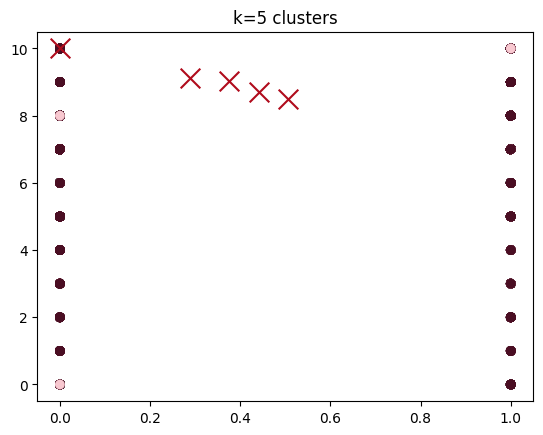

In [92]:
# To better understand the spread, we visualize the clusters.

#  Loop to plot clusters and centroids
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(scaled_data)
    plt.scatter(scaled_data.iloc[:, 0], scaled_data.iloc[:, 1], c=kmeans.labels_, cmap=c_colors)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='#B00B1C', marker='x', s=200)
    plt.title(f'k={k} clusters')
    plt.show()

In [93]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.cluster import KMeans

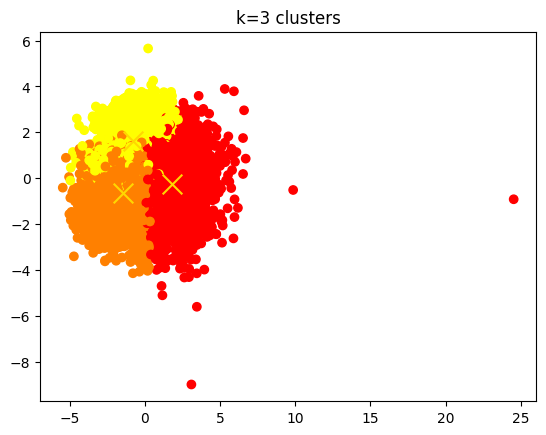

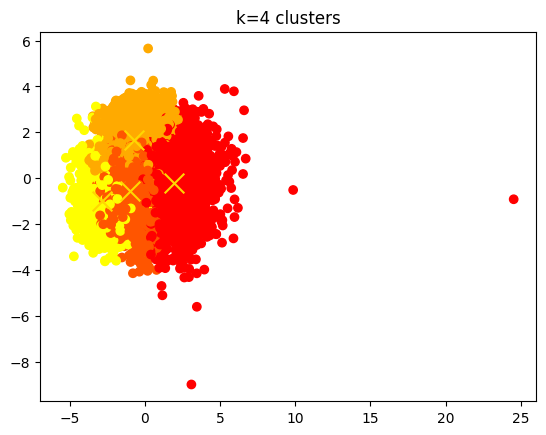

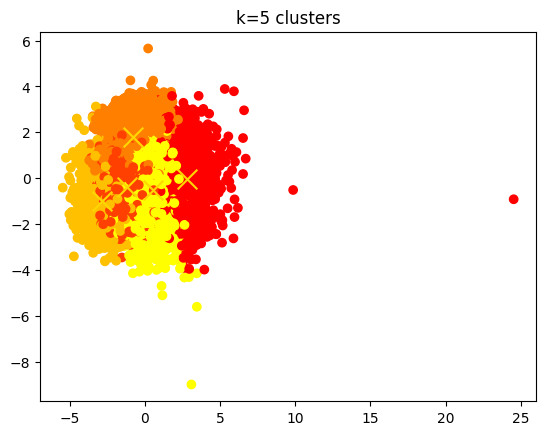

In [94]:
#  Loop to plot clusters and centroids
fall_colors = cm.autumn
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(pca_df)
    plt.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 1], c=kmeans.labels_,cmap=fall_colors)

    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='#FFD700', marker='x', s=200)
    plt.title(f'k={k} clusters')
    plt.show()

# Trying new features 

In [95]:
scaled_data.describe()

Survey Response Channel     NPS Score  High Value Client Indicator  \
count             11044.000000  11044.000000                 11044.000000   
mean                  0.491670      8.533774                     0.196577   
std                   0.499953      2.322118                     0.397428   
min                   0.000000      0.000000                     0.000000   
25%                   0.000000      8.000000                     0.000000   
50%                   0.000000     10.000000                     0.000000   
75%                   1.000000     10.000000                     0.000000   
max                   1.000000     10.000000                     1.000000   

       Has Credit Card  Has Deposit Account  Has Investment Account  \
count     11044.000000         11044.000000            11044.000000   
mean          0.837468             0.935531                0.449475   
std           0.368955             0.245598                0.497463   
min           0.000000             0.000000                0.000000   
25%           1.000000             1.000000                0.000000   
50%           1.000000             1.000000                0.000000   
75%           1.000000             1.000000                1.000000   
max           1.000000             1.000000                1.000000   

       Has Borrowing Product  Total Product Count  Total Funds Managed  \
count           11044.000000         11044.000000         1.104400e+04   
mean                0.520645             5.190148         1.124349e+05   
std                 0.499596             2.567722         3.378358e+05   
min                 0.000000             1.000000         0.000000e+00   
25%                 0.000000             3.000000         4.400000e+03   
50%                 1.000000             5.000000         2.020000e+04   
75%                 1.000000             7.000000         1.006000e+05   
max                 1.000000            17.000000         2.392490e+07   

       Chequing Balance  ...  Age_51 to 65  Age_66 to 70  Age_71 to 75  \
count      11044.000000  ...  11044.000000  11044.000000  11044.000000   
mean        6531.030424  ...      0.295817      0.119975      0.116081   
std        20358.181085  ...      0.456430      0.324947      0.320337   
min            0.000000  ...      0.000000      0.000000      0.000000   
25%          200.000000  ...      0.000000      0.000000      0.000000   
50%         1600.000000  ...      0.000000      0.000000      0.000000   
75%         5400.000000  ...      1.000000      0.000000      0.000000   
max       647100.000000  ...      1.000000      1.000000      1.000000   

       Age_76 to 80  Age_81 to 85       Age_85+    Age_No Age  \
count  11044.000000  11044.000000  11044.000000  11044.000000   
mean       0.068363      0.038664      0.017113      0.010866   
std        0.252379      0.192800      0.129700      0.103675   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000   

       Length as Client (Years)  Time Since Survey Date (Years)       Cluster  
count              11044.000000                    11044.000000  11044.000000  
mean                  22.008277                        0.632943     -0.940873  
std                   14.782011                        0.297645      0.352786  
min                    0.657084                        0.175222     -1.000000  
25%                    7.759069                        0.364134     -1.000000  
50%                   21.815195                        0.616016     -1.000000  
75%                   34.806297                        0.903491     -1.000000  
max                   56.824093                        1.114305      2.000000  

[8 rows x 57 columns]

In [96]:
from scipy.stats import ttest_ind 

In [97]:
# Customer Satisfaction Score (CSAT)
def nps_to_csat(nps):
    if nps >=9:
        return np.random.uniform(80, 100) # Promoters
    elif nps >=7:
        return np.random.uniform(60, 79) # Passives
    else:
        return np.random.uniform(0, 59) # Detractors

numeric_data['CSAT_Score'] = numeric_data['NPS Score'].apply(nps_to_csat)

In [98]:
# A/B Testing: High vs Low Product Engagement
high_engagement = numeric_data[numeric_data['Total Product Count'] >= numeric_data['Total Product Count'].median()]['NPS Score']
low_engagement = numeric_data[numeric_data['Total Product Count'] <= numeric_data['Total Product Count'].median()]['NPS Score']

# Perform independent T-test t compare means.
t_stat, p_value = ttest_ind(high_engagement, low_engagement, equal_var=False)

In [99]:
# Dispaly results
csat_summary = numeric_data[['NPS Score', 'CSAT_Score']].corr().iloc[0,1]

print('Correlation between CSAT & NPS:', csat_summary)
print("A/B Test - T-Statistic:", t_stat)
print("A/B Test - P-Value:", p_value)

Correlation between CSAT & NPS: 0.8527499162600789
A/B Test - T-Statistic: 5.419690996268133
A/B Test - P-Value: 6.080194250850391e-08


This suggests that with a P-va of 6.08 we fail to reject the null hypothesis, suggesting that prodcut engagement may not influence NPS.

In [100]:
# 1.2 Segment NPS Groups
def categorize_nps(nps):
    if nps <= 6:
        return 'Detractor'
    elif 7 <= nps <= 8:
        return 'Passive'
    else:
        return 'Promoter'

scaled_data['NPS_Category'] = scaled_data['NPS Score'].apply(categorize_nps)

NPS_Category             Detractor  Passive  Promoter
Survey Response Channel                              
0                              751     1212      3651
1                              609     1069      3752


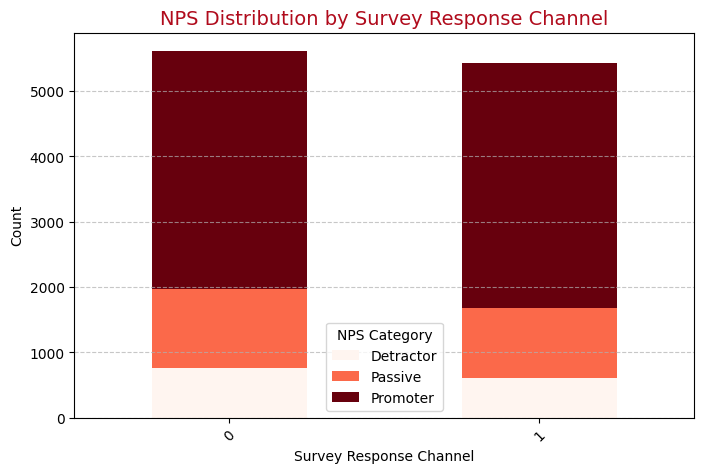

In [101]:
# Count the occurrences of each NPS category per survey response channel
nps_by_channel = scaled_data.groupby(['Survey Response Channel', 'NPS_Category']).size().unstack()

# Print the table
print(nps_by_channel)

# Plot the distribution as a stacked bar chart
nps_by_channel.plot(kind='bar', stacked=True, colormap='Reds', figsize=(8, 5))

plt.title('NPS Distribution by Survey Response Channel', fontsize=14, color='#B00B1C')
plt.xlabel('Survey Response Channel')
plt.ylabel('Count')
plt.legend(title='NPS Category')
plt.xticks(rotation=45)  # Rotate labels if necessary
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Improve readability
plt.show()

NPS_Category                                            Detractor  Passive  \
Time Since Survey Date (Years) Survey Response Channel                       
0.175222                       0                              NaN      NaN   
                               1                              NaN      NaN   
0.177960                       0                              1.0      2.0   
                               1                              1.0      6.0   
0.180698                       0                              8.0     10.0   
...                                                           ...      ...   
1.108830                       1                              1.0      4.0   
1.111567                       0                              7.0      8.0   
                               1                              2.0      8.0   
1.114305                       0                             26.0     40.0   
                               1                             33.

<Figure size 1200x600 with 0 Axes>

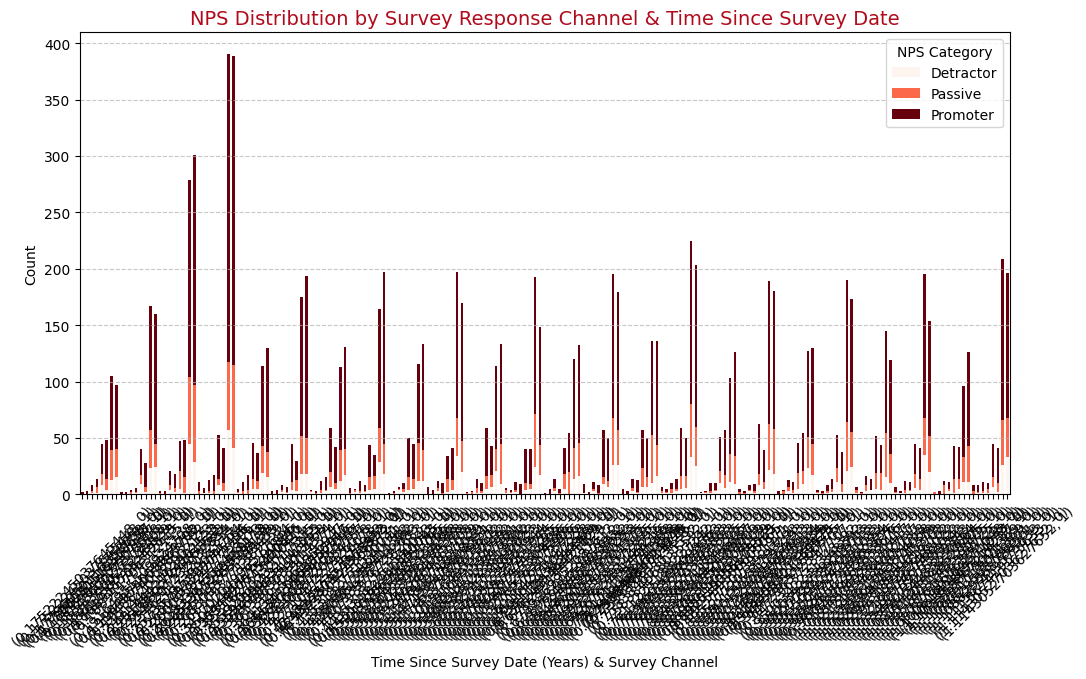

In [102]:
# Group by Survey Response Channel & Time Since Survey Date, counting each NPS Category
nps_comparison = scaled_data.groupby(['Time Since Survey Date (Years)', 'Survey Response Channel', 'NPS_Category']).size().unstack()

# Print the table
print(nps_comparison)

# Plot the distribution as a stacked bar chart
plt.figure(figsize=(12, 6))
nps_comparison.plot(kind='bar', stacked=True, colormap='Reds', figsize=(12, 6))

plt.title('NPS Distribution by Survey Response Channel & Time Since Survey Date', fontsize=14, color='#B00B1C')
plt.xlabel('Time Since Survey Date (Years) & Survey Channel')
plt.ylabel('Count')
plt.legend(title='NPS Category')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\tauny\AppData\Local\Temp\ipykernel_25360\3353680516.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nps_comparison = scaled_data.groupby(['Survey_Age_Group', 'Survey Response Channel', 'NPS_Category']).size().unstack()


<Figure size 1400x600 with 0 Axes>

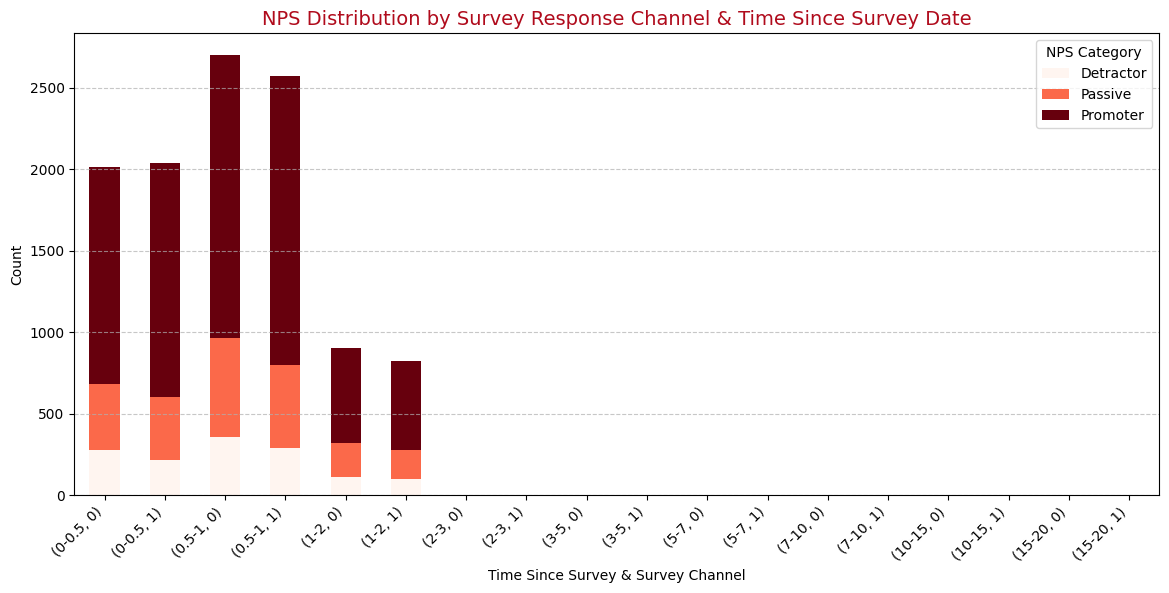

In [103]:
# Bin "Time Since Survey Date (Years)" into intervals
bins = [0, 0.5, 1, 2, 3, 5, 7, 10, 15, 20]  # More granularity
labels = ['0-0.5', '0.5-1', '1-2', '2-3', '3-5', '5-7', '7-10', '10-15', '15-20']
scaled_data['Survey_Age_Group'] = pd.cut(scaled_data['Time Since Survey Date (Years)'], bins=bins, labels=labels)

# Group by Survey Age Group & Survey Channel
nps_comparison = scaled_data.groupby(['Survey_Age_Group', 'Survey Response Channel', 'NPS_Category']).size().unstack()

# Plot the improved stacked bar chart
plt.figure(figsize=(14, 6))
nps_comparison.plot(kind='bar', stacked=True, colormap='Reds', figsize=(14, 6))

plt.title('NPS Distribution by Survey Response Channel & Time Since Survey Date', fontsize=14, color='#B00B1C')
plt.xlabel('Time Since Survey & Survey Channel')
plt.ylabel('Count')
plt.legend(title='NPS Category')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate and align labels
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [104]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11044 entries, 0 to 11043
Data columns (total 58 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Survey Response Channel         11044 non-null  int64  
 1   NPS Score                       11044 non-null  int64  
 2   High Value Client Indicator     11044 non-null  int64  
 3   Has Credit Card                 11044 non-null  int64  
 4   Has Deposit Account             11044 non-null  int64  
 5   Has Investment Account          11044 non-null  int64  
 6   Has Borrowing Product           11044 non-null  int64  
 7   Total Product Count             11044 non-null  int64  
 8   Total Funds Managed             11044 non-null  float64
 9   Chequing Balance                11044 non-null  float64
 10  Savings Balance                 11044 non-null  float64
 11  Credit Card Balance             11044 non-null  float64
 12  Client Attrited                 

In [105]:
# --- 2. Compare Mean NPS Scores for Mobile vs. Online ---
mobile_nps = numeric_data[numeric_data["Survey Response Channel"] == 0]["NPS Score"]
online_nps = numeric_data[numeric_data["Survey Response Channel"] == 1]["NPS Score"]

mobile_mean = mobile_nps.mean()
online_mean = online_nps.mean()

# T-test to Check Statistical Significance
t_stat, p_value = ttest_ind(mobile_nps, online_nps, equal_var=False)

# Print results
print(f"Average NPS Score for Mobile Users: {mobile_mean:.2f}")
print(f"Average NPS Score for Online Users: {online_mean:.2f}")
print(f"T-Statistic: {t_stat:.2f}, P-Value: {p_value:.5f}")

if p_value < 0.05:
    print("✅ The difference in NPS scores between Mobile and Online users is statistically significant.")
else:
    print("❌ No significant difference in NPS scores between Mobile and Online users.")

Average NPS Score for Mobile Users: 8.45
Average NPS Score for Online Users: 8.62
T-Statistic: -3.97, P-Value: 0.00007
✅ The difference in NPS scores between Mobile and Online users is statistically significant.


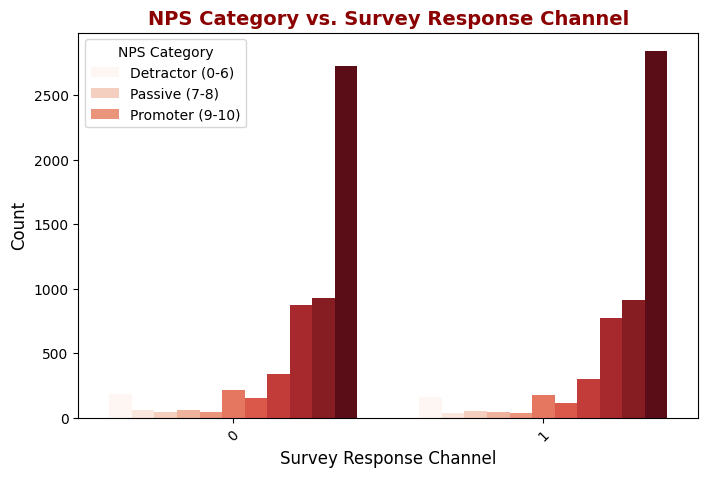

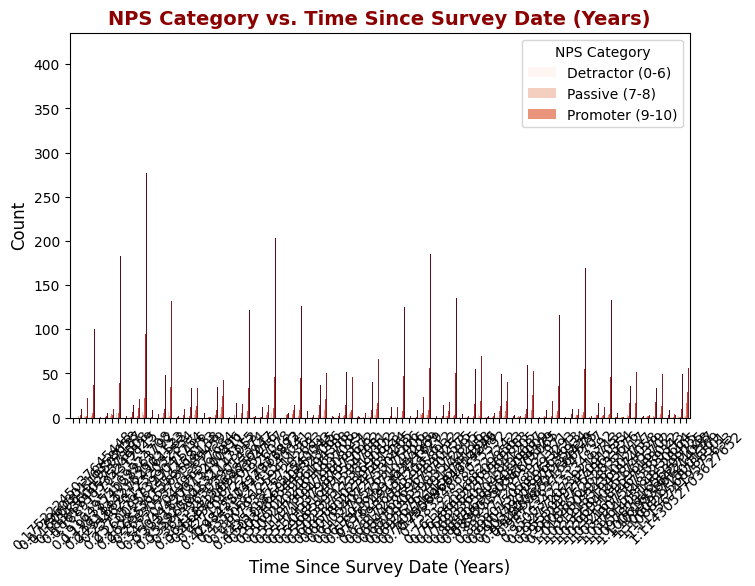

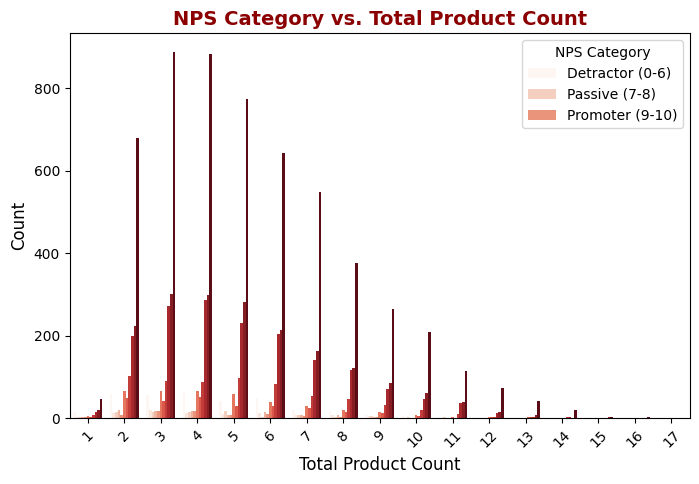

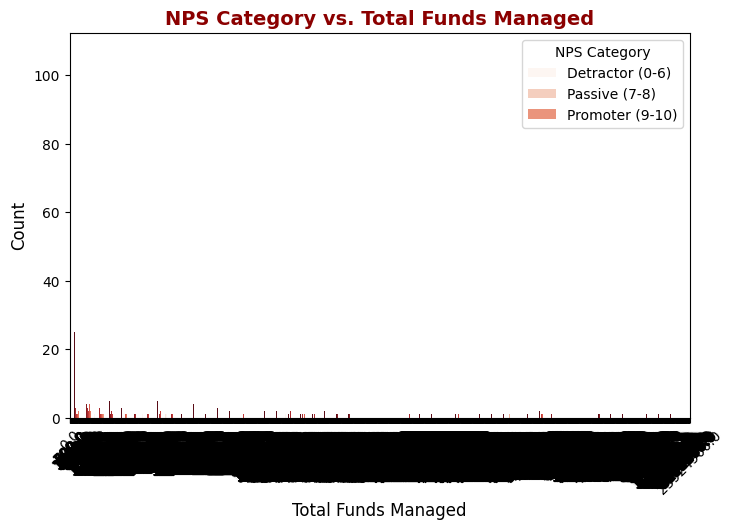

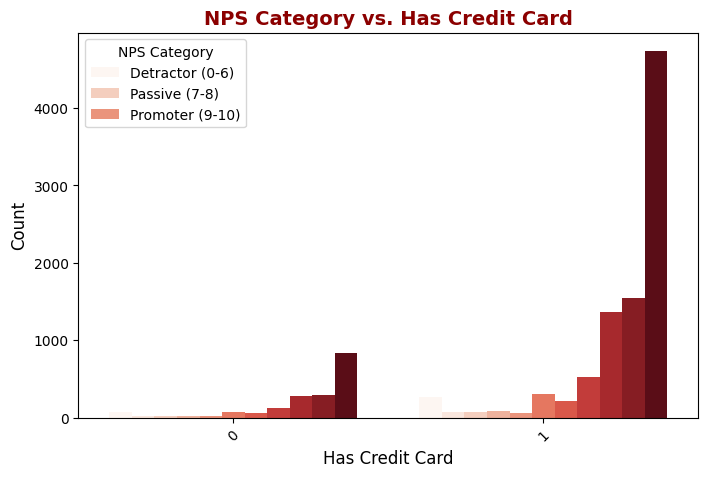

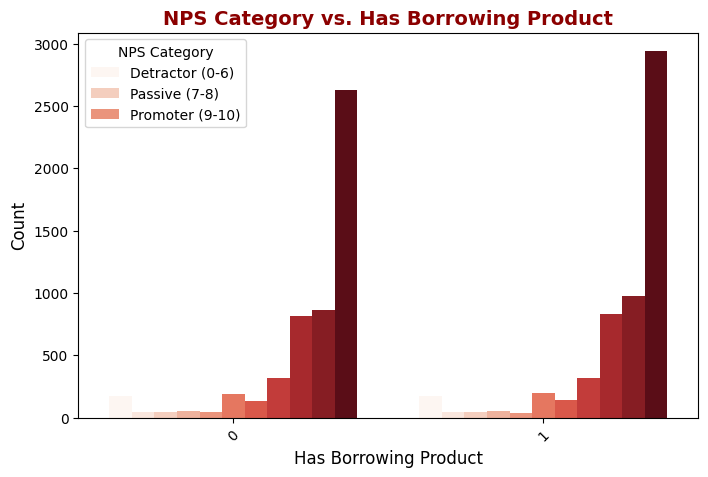

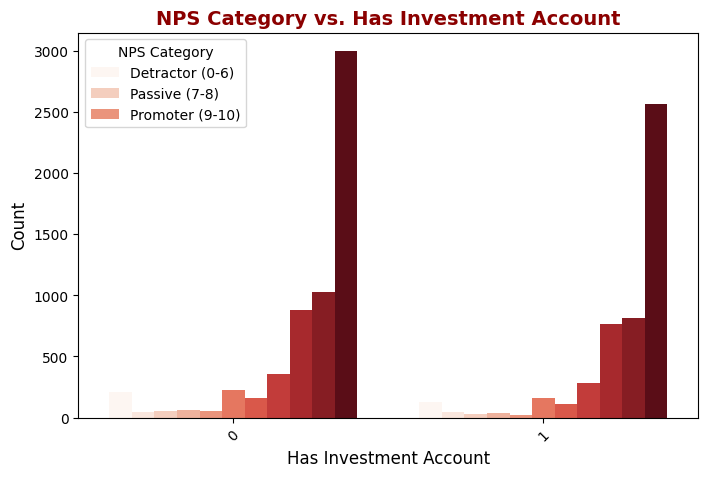

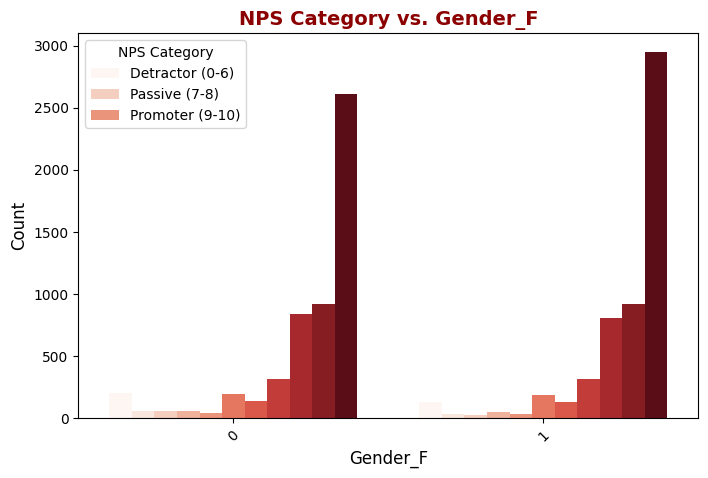

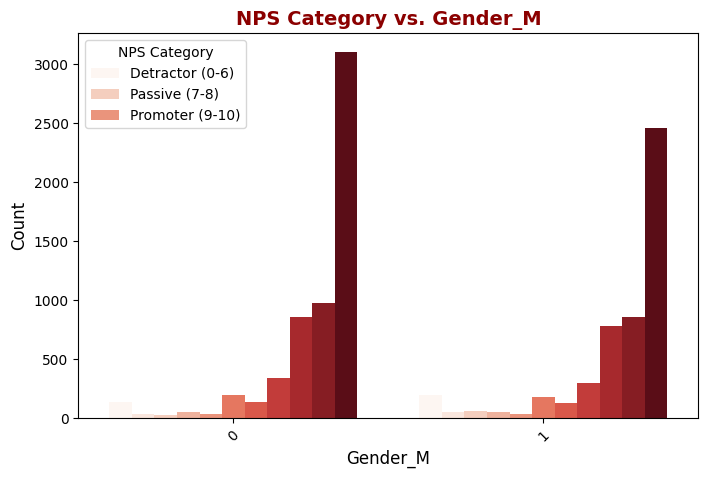

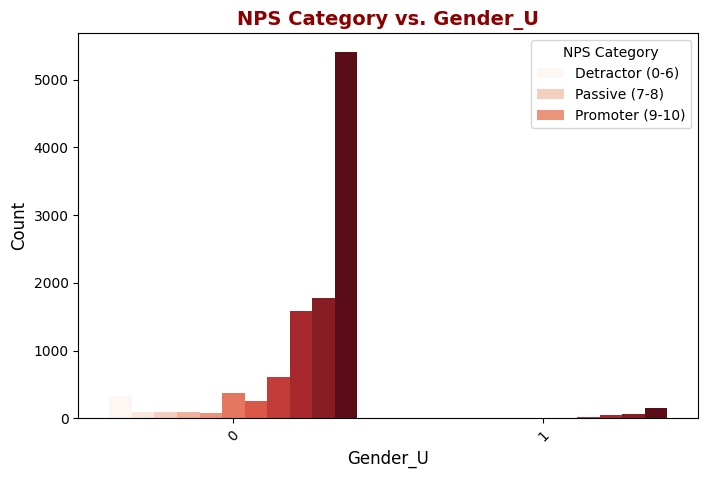

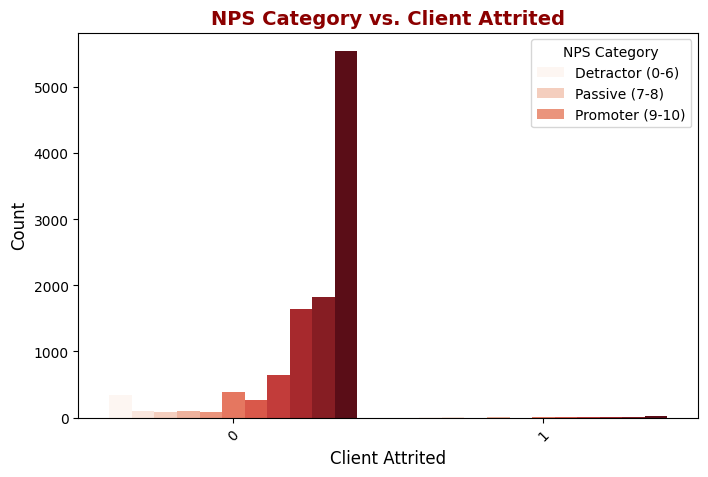

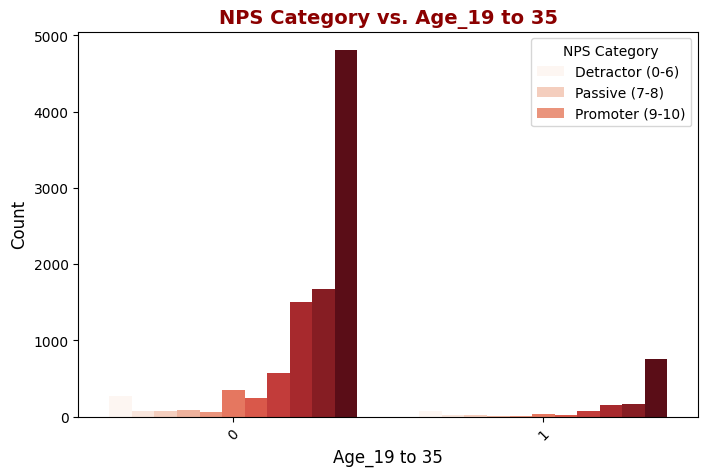

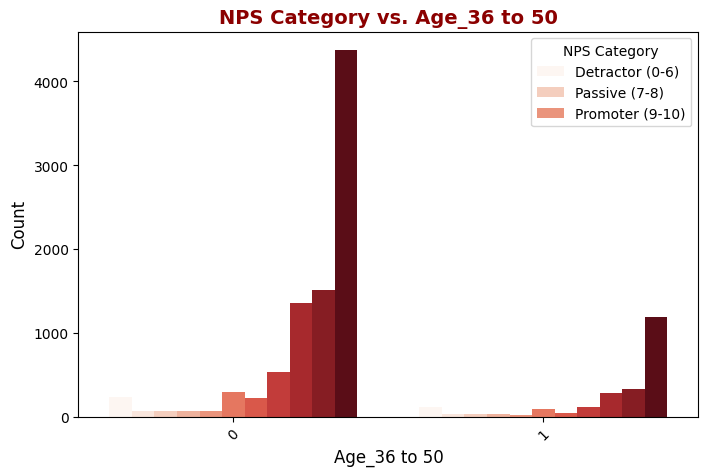

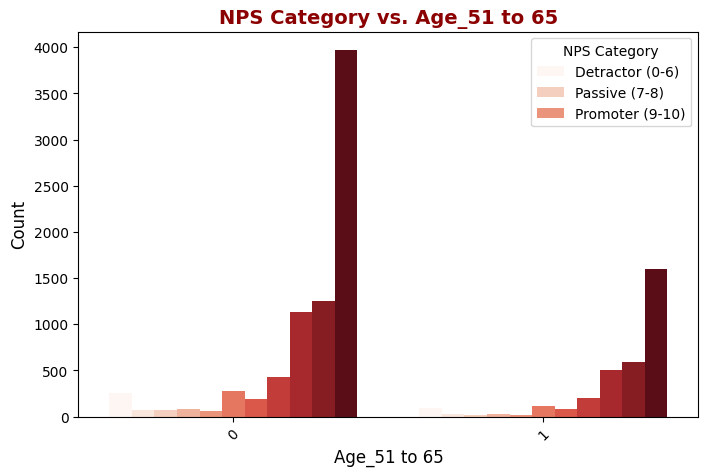

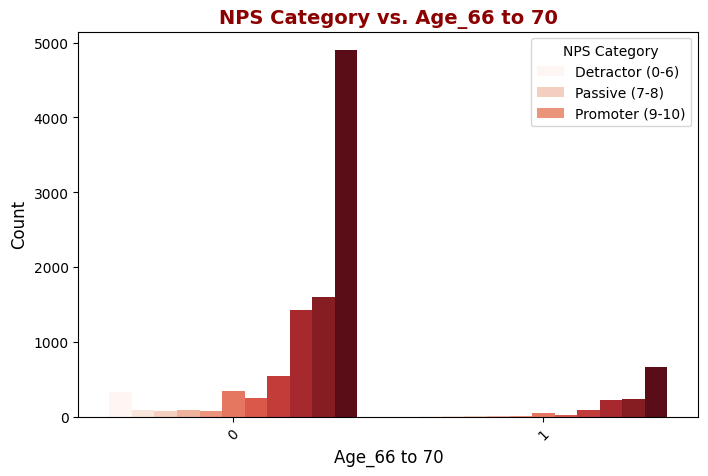

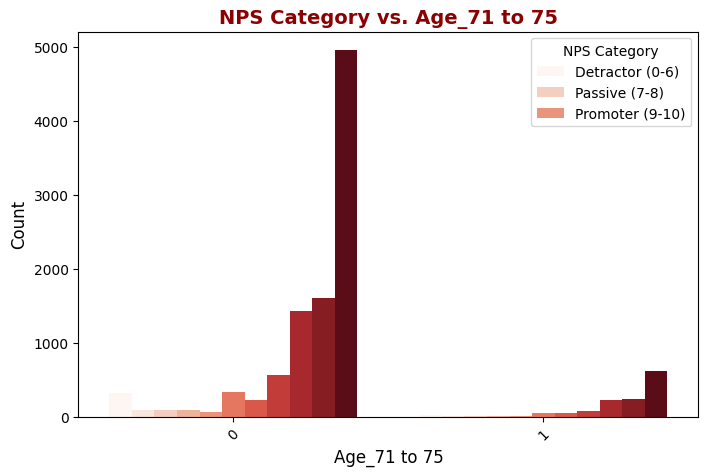

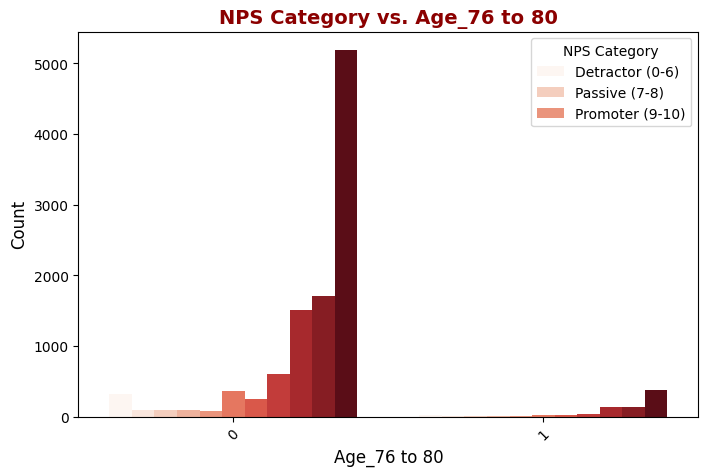

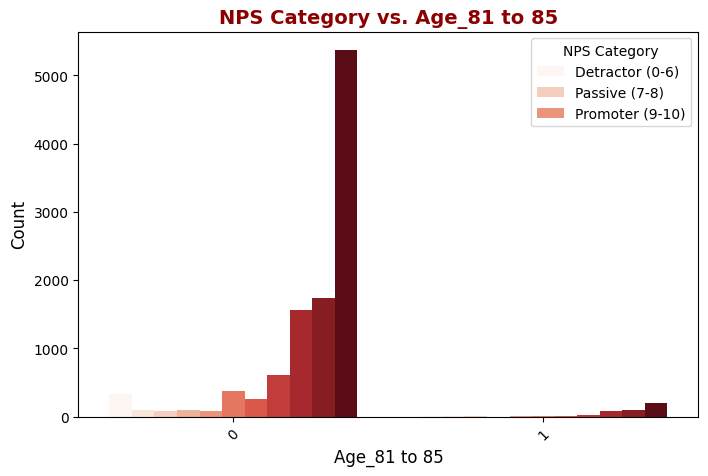

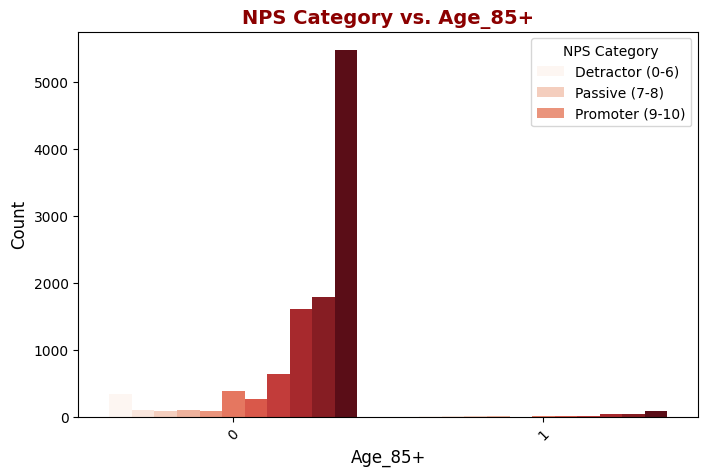

In [106]:
# Define features to compare with NPS Category
features = [
    "Survey Response Channel", "Time Since Survey Date (Years)", "Total Product Count", 
    "Total Funds Managed", "Has Credit Card", "Has Borrowing Product", "Has Investment Account",
    "Gender_F", "Gender_M", "Gender_U", "Client Attrited",
    "Age_19 to 35", "Age_36 to 50", "Age_51 to 65", "Age_66 to 70", "Age_71 to 75",
    "Age_76 to 80", "Age_81 to 85", "Age_85+"
]

# Generate bar plots
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=scaled_data, x=feature, hue="NPS Score", palette="Reds")
    plt.title(f"NPS Category vs. {feature}", fontsize=14, color="darkred", fontweight="bold")
    plt.xlabel(feature, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.legend(title="NPS Category", labels=["Detractor (0-6)", "Passive (7-8)", "Promoter (9-10)"])
    plt.xticks(rotation=45)
    plt.show()

In [107]:
print(list(scaled_data.columns))

['Survey Response Channel', 'NPS Score', 'High Value Client Indicator', 'Has Credit Card', 'Has Deposit Account', 'Has Investment Account', 'Has Borrowing Product', 'Total Product Count', 'Total Funds Managed', 'Chequing Balance', 'Savings Balance', 'Credit Card Balance', 'Client Attrited', 'Has Chequing Account', 'Has Savings Account', 'Has Credit Card Account', 'Gender_F', 'Gender_M', 'Gender_U', 'Province_AB', 'Province_AZ', 'Province_BC', 'Province_CA', 'Province_CO', 'Province_FL', 'Province_GA', 'Province_IL', 'Province_MB', 'Province_MD', 'Province_MI', 'Province_NB', 'Province_NC', 'Province_NJ', 'Province_NL', 'Province_NS', 'Province_NT', 'Province_NU', 'Province_NY', 'Province_ON', 'Province_PA', 'Province_PE', 'Province_SK', 'Province_Unknown', 'Province_YT', 'Age_0 to 18', 'Age_19 to 35', 'Age_36 to 50', 'Age_51 to 65', 'Age_66 to 70', 'Age_71 to 75', 'Age_76 to 80', 'Age_81 to 85', 'Age_85+', 'Age_No Age', 'Length as Client (Years)', 'Time Since Survey Date (Years)', 'Clu

In [108]:
scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11044 entries, 0 to 11043
Data columns (total 59 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Survey Response Channel         11044 non-null  int64   
 1   NPS Score                       11044 non-null  int64   
 2   High Value Client Indicator     11044 non-null  int64   
 3   Has Credit Card                 11044 non-null  int64   
 4   Has Deposit Account             11044 non-null  int64   
 5   Has Investment Account          11044 non-null  int64   
 6   Has Borrowing Product           11044 non-null  int64   
 7   Total Product Count             11044 non-null  int64   
 8   Total Funds Managed             11044 non-null  float64 
 9   Chequing Balance                11044 non-null  float64 
 10  Savings Balance                 11044 non-null  float64 
 11  Credit Card Balance             11044 non-null  float64 
 12  Client Attrited   

In [109]:

# Define features (X) and target variable (y)
X = scaled_data[['Survey Response Channel', 'NPS Score', 'High Value Client Indicator', 'Has Credit Card', 'Has Deposit Account', 'Has Investment Account', 'Has Borrowing Product', 'Total Product Count', 'Total Funds Managed', 'Chequing Balance', 'Savings Balance', 'Credit Card Balance', 'Has Chequing Account', 'Has Savings Account', 'Has Credit Card Account','Province_AB', 'Province_AZ', 'Province_BC', 'Province_CA', 'Province_CO', 'Province_FL', 'Province_GA', 'Province_IL', 'Province_MB', 'Province_MD', 'Province_MI', 'Province_NB', 'Province_NC', 'Province_NJ', 'Province_NL', 'Province_NS', 'Province_NT', 'Province_NU', 'Province_NY', 'Province_ON', 'Province_PA', 'Province_PE', 'Province_SK', 'Province_Unknown', 'Province_YT', 'Age_0 to 18', 'Age_19 to 35', 'Age_36 to 50', 'Age_51 to 65', 'Age_66 to 70', 'Age_71 to 75', 'Age_76 to 80', 'Age_81 to 85', 'Age_85+', 'Age_No Age', 'Length as Client (Years)', 'Time Since Survey Date (Years)']]
y = scaled_data['Client Attrited']


In [110]:
# Split the data into train (70%), test (20%), and validation (10%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Further split the temp set into test and validation (50-50 split of the 30%)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Output the shapes for sanity check
print(f"Train set: {X_train.shape}, {y_train.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")

Train set: (7730, 52), (7730,)
Test set: (1657, 52), (1657,)
Validation set: (1657, 52), (1657,)


In [111]:
# Check the head of X_train
print("X_train Head:")
print(X_train.head())

# Check the head of y_train
print("\nY_train Head:")
print(y_train.head())

X_train Head:
       Survey Response Channel  NPS Score  High Value Client Indicator  \
7678                         1         10                            0   
618                          1          0                            1   
9072                         0          9                            0   
10880                        0         10                            1   
1600                         0          2                            0   

       Has Credit Card  Has Deposit Account  Has Investment Account  \
7678                 1                    1                       1   
618                  1                    1                       0   
9072                 1                    1                       0   
10880                1                    1                       1   
1600                 1                    1                       1   

       Has Borrowing Product  Total Product Count  Total Funds Managed  \
7678                       1            

In [112]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE on training data
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # 50% minority-to-majority ratio
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the new class distribution
from collections import Counter
print("Class distribution after SMOTE:", Counter(y_train_smote))

Class distribution after SMOTE: Counter({0: 7701, 1: 3850})


c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [113]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [114]:
# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

# Evaluate models
for name, model in models.items():
    # Train the model on training data
    model.fit(X_train_smote, y_train_smote)
    
    # Predict on validation set
    y_val_pred = model.predict(X_val)
    
    # Calculate metrics
    precision = precision_score(y_val, y_val_pred, zero_division=0)
    recall = recall_score(y_val, y_val_pred, zero_division=0)
    f1 = f1_score(y_val, y_val_pred, zero_division=0)
    accuracy = accuracy_score(y_val, y_val_pred)
    matrix = confusion_matrix(y_val, y_val_pred)
    cross_val = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring='accuracy').mean()
    
    # Display results
    print(f"Model: {name}")
    print(f"Validation Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
    print(f"Cross-Validation Accuracy (Train): {cross_val:.4f}")
    print(f"Confusion Matrix (Validation):\n{matrix}\n")

Model: Random Forest
Validation Accuracy: 0.9952, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000
Cross-Validation Accuracy (Train): 0.9977
Confusion Matrix (Validation):
[[1649    3]
 [   5    0]]



c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Model: Logistic Regression
Validation Accuracy: 0.9855, Precision: 0.0476, Recall: 0.2000, F1-score: 0.0769
Cross-Validation Accuracy (Train): 0.9881
Confusion Matrix (Validation):
[[1632   20]
 [   4    1]]

Model: Decision Tree
Validation Accuracy: 0.9922, Precision: 0.1000, Recall: 0.2000, F1-score: 0.1333
Cross-Validation Accuracy (Train): 0.9945
Confusion Matrix (Validation):
[[1643    9]
 [   4    1]]

Model: SVM
Validation Accuracy: 0.7194, Precision: 0.0106, Recall: 1.0000, F1-score: 0.0211
Cross-Validation Accuracy (Train): 0.7864
Confusion Matrix (Validation):
[[1187  465]
 [   0    5]]



In [115]:
# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)  # Enable probability output for SVM
}

# Set custom threshold
threshold = 0.3

# Evaluate models
for name, model in models.items():
    # Train the model on SMOTE training data
    model.fit(X_train_smote, y_train_smote)
    
    # Predict probabilities on validation set
    y_val_probs = model.predict_proba(X_val)[:, 1]  # Probabilities for class 1
    
    # Apply the custom threshold
    y_val_pred = (y_val_probs >= threshold).astype(int)
    
    # Calculate metrics
    precision = precision_score(y_val, y_val_pred, zero_division=0)
    recall = recall_score(y_val, y_val_pred, zero_division=0)
    f1 = f1_score(y_val, y_val_pred, zero_division=0)
    accuracy = accuracy_score(y_val, y_val_pred)
    matrix = confusion_matrix(y_val, y_val_pred)
    cross_val = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring='accuracy').mean()
    
    # Display results
    print(f"Model: {name}")
    print(f"Validation Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
    print(f"Cross-Validation Accuracy (Train): {cross_val:.4f}")
    print(f"Confusion Matrix (Validation):\n{matrix}\n")

Model: Random Forest
Validation Accuracy: 0.9940, Precision: 0.1429, Recall: 0.2000, F1-score: 0.1667
Cross-Validation Accuracy (Train): 0.9977
Confusion Matrix (Validation):
[[1646    6]
 [   4    1]]



c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Model: Logistic Regression
Validation Accuracy: 0.9801, Precision: 0.0882, Recall: 0.6000, F1-score: 0.1538
Cross-Validation Accuracy (Train): 0.9881
Confusion Matrix (Validation):
[[1621   31]
 [   2    3]]

Model: Decision Tree
Validation Accuracy: 0.9922, Precision: 0.1000, Recall: 0.2000, F1-score: 0.1333
Cross-Validation Accuracy (Train): 0.9945
Confusion Matrix (Validation):
[[1643    9]
 [   4    1]]

Model: SVM
Validation Accuracy: 0.7465, Precision: 0.0118, Recall: 1.0000, F1-score: 0.0233
Cross-Validation Accuracy (Train): 0.7864
Confusion Matrix (Validation):
[[1232  420]
 [   0    5]]



In [116]:
pip uninstall -y scikit-learn

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
Note: you may need to restart the kernel to use updated packages.


You can safely remove it manually.


In [117]:
pip install --no-cache-dir -U scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/11.1 MB 8.4 MB/s eta 0:00:02
   ------------- -------------------------- 3.7/11.1 MB 9.9 MB/s eta 0:00:01
   --------------------- ------------------ 6.0/11.1 MB 10.5 MB/s eta 0:00:01
   ----------------------------- ---------- 8.1/11.1 MB 10.7 MB/s eta 0:00:01
   --------------------------------- ------ 9.2/11.1 MB 9.2 MB/s eta 0:00:01
   -------------------------------------- - 10.7/11.1 MB 8.7 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 8.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [118]:
!python -m pip install --upgrade pip

In [119]:
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

# Define additional models
models = {
    "Bagging Classifier": BaggingClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42),
    "Gaussian Naive Bayes": GaussianNB(),
    "Ridge Classifier": RidgeClassifier(),
    "Neural Network (MLP)": MLPClassifier(max_iter=1000, random_state=42),
    "Balanced Random Forest": BalancedRandomForestClassifier(random_state=42)
}

# Evaluate models
for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)  # Train model on SMOTE data
    y_val_pred = (model.predict_proba(X_val)[:, 1] >= 0.3).astype(int) if hasattr(model, "predict_proba") else model.predict(X_val)  # Threshold for proba models
    precision = precision_score(y_val, y_val_pred, zero_division=0)
    recall = recall_score(y_val, y_val_pred, zero_division=0)
    f1 = f1_score(y_val, y_val_pred, zero_division=0)
    accuracy = accuracy_score(y_val, y_val_pred)
    matrix = confusion_matrix(y_val, y_val_pred)
    cross_val = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring="accuracy").mean()
    
    print(f"Model: {name}")
    print(f"Validation Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
    print(f"Cross-Validation Accuracy (Train): {cross_val:.4f}")
    print(f"Confusion Matrix (Validation):\n{matrix}\n")

Model: Bagging Classifier
Validation Accuracy: 0.9903, Precision: 0.0769, Recall: 0.2000, F1-score: 0.1111
Cross-Validation Accuracy (Train): 0.9967
Confusion Matrix (Validation):
[[1640   12]
 [   4    1]]

Model: Extra Trees
Validation Accuracy: 0.9928, Precision: 0.1111, Recall: 0.2000, F1-score: 0.1429
Cross-Validation Accuracy (Train): 0.9975
Confusion Matrix (Validation):
[[1644    8]
 [   4    1]]

Model: Gaussian Naive Bayes
Validation Accuracy: 0.8751, Precision: 0.0236, Recall: 1.0000, F1-score: 0.0461
Cross-Validation Accuracy (Train): 0.9154
Confusion Matrix (Validation):
[[1445  207]
 [   0    5]]

Model: Ridge Classifier
Validation Accuracy: 0.9964, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000
Cross-Validation Accuracy (Train): 0.9829
Confusion Matrix (Validation):
[[1651    1]
 [   5    0]]

Model: Neural Network (MLP)
Validation Accuracy: 0.9807, Precision: 0.0909, Recall: 0.6000, F1-score: 0.1579
Cross-Validation Accuracy (Train): 0.9700
Confusion Matrix (Valida

c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set

Model: Balanced Random Forest
Validation Accuracy: 0.9849, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000
Cross-Validation Accuracy (Train): 0.9967
Confusion Matrix (Validation):
[[1632   20]
 [   5    0]]



c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\U

Change the output/ target variable to high value client indicator

In [120]:

# Define features (X) and target variable (y)
X = scaled_data[['Client Attrited','Survey Response Channel', 'NPS Score', 'Has Credit Card', 'Has Deposit Account', 'Has Investment Account', 'Has Borrowing Product', 'Total Product Count', 'Total Funds Managed', 'Chequing Balance', 'Savings Balance', 'Credit Card Balance', 'Has Chequing Account', 'Has Savings Account', 'Has Credit Card Account','Province_AB', 'Province_AZ', 'Province_BC', 'Province_CA', 'Province_CO', 'Province_FL', 'Province_GA', 'Province_IL', 'Province_MB', 'Province_MD', 'Province_MI', 'Province_NB', 'Province_NC', 'Province_NJ', 'Province_NL', 'Province_NS', 'Province_NT', 'Province_NU', 'Province_NY', 'Province_ON', 'Province_PA', 'Province_PE', 'Province_SK', 'Province_Unknown', 'Province_YT', 'Age_0 to 18', 'Age_19 to 35', 'Age_36 to 50', 'Age_51 to 65', 'Age_66 to 70', 'Age_71 to 75', 'Age_76 to 80', 'Age_81 to 85', 'Age_85+', 'Age_No Age', 'Length as Client (Years)', 'Time Since Survey Date (Years)']]
y = scaled_data['High Value Client Indicator']

# Split the data into train (70%), test (20%), and validation (10%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Further split the temp set into test and validation (50-50 split of the 30%)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Output the shapes for sanity check
print(f"Train set: {X_train.shape}, {y_train.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")

# Apply SMOTE on training data
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # 50% minority-to-majority ratio
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the new class distribution
from collections import Counter
print("Class distribution after SMOTE:", Counter(y_train_smote))

# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

# Evaluate models
for name, model in models.items():
    # Train the model on training data
    model.fit(X_train_smote, y_train_smote)
    
    # Predict on validation set
    y_val_pred = model.predict(X_val)
    
    # Calculate metrics
    precision = precision_score(y_val, y_val_pred, zero_division=0)
    recall = recall_score(y_val, y_val_pred, zero_division=0)
    f1 = f1_score(y_val, y_val_pred, zero_division=0)
    accuracy = accuracy_score(y_val, y_val_pred)
    matrix = confusion_matrix(y_val, y_val_pred)
    cross_val = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring='accuracy').mean()
    
    # Display results
    print(f"Model: {name}")
    print(f"Validation Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
    print(f"Cross-Validation Accuracy (Train): {cross_val:.4f}")
    print(f"Confusion Matrix (Validation):\n{matrix}\n")

Train set: (7730, 52), (7730,)
Test set: (1657, 52), (1657,)
Validation set: (1657, 52), (1657,)
Class distribution after SMOTE: Counter({0: 6204, 1: 3102})


c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Model: Random Forest
Validation Accuracy: 0.8666, Precision: 0.7074, Recall: 0.5736, F1-score: 0.6335
Cross-Validation Accuracy (Train): 0.8905
Confusion Matrix (Validation):
[[1245   79]
 [ 142  191]]



c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Model: Logistic Regression
Validation Accuracy: 0.8552, Precision: 0.6755, Recall: 0.5375, F1-score: 0.5987
Cross-Validation Accuracy (Train): 0.8550
Confusion Matrix (Validation):
[[1238   86]
 [ 154  179]]

Model: Decision Tree
Validation Accuracy: 0.8063, Precision: 0.5173, Recall: 0.5375, F1-score: 0.5272
Cross-Validation Accuracy (Train): 0.8357
Confusion Matrix (Validation):
[[1157  167]
 [ 154  179]]

Model: SVM
Validation Accuracy: 0.8473, Precision: 0.6190, Recall: 0.6246, F1-score: 0.6218
Cross-Validation Accuracy (Train): 0.8372
Confusion Matrix (Validation):
[[1196  128]
 [ 125  208]]



In [121]:
# Define additional models
models = {
    "Bagging Classifier": BaggingClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42),
    "Gaussian Naive Bayes": GaussianNB(),
    "Ridge Classifier": RidgeClassifier(),
    "Neural Network (MLP)": MLPClassifier(max_iter=1000, random_state=42),
    "Balanced Random Forest": BalancedRandomForestClassifier(random_state=42)
}

# Evaluate models
for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)  # Train model on SMOTE data
    y_val_pred = (model.predict_proba(X_val)[:, 1] >= 0.3).astype(int) if hasattr(model, "predict_proba") else model.predict(X_val)  # Threshold for proba models
    precision = precision_score(y_val, y_val_pred, zero_division=0)
    recall = recall_score(y_val, y_val_pred, zero_division=0)
    f1 = f1_score(y_val, y_val_pred, zero_division=0)
    accuracy = accuracy_score(y_val, y_val_pred)
    matrix = confusion_matrix(y_val, y_val_pred)
    cross_val = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring="accuracy").mean()
    
    print(f"Model: {name}")
    print(f"Validation Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
    print(f"Cross-Validation Accuracy (Train): {cross_val:.4f}")
    print(f"Confusion Matrix (Validation):\n{matrix}\n")

Model: Bagging Classifier
Validation Accuracy: 0.7815, Precision: 0.4720, Recall: 0.7327, F1-score: 0.5741
Cross-Validation Accuracy (Train): 0.8729
Confusion Matrix (Validation):
[[1051  273]
 [  89  244]]

Model: Extra Trees
Validation Accuracy: 0.7936, Precision: 0.4908, Recall: 0.7177, F1-score: 0.5829
Cross-Validation Accuracy (Train): 0.8768
Confusion Matrix (Validation):
[[1076  248]
 [  94  239]]

Model: Gaussian Naive Bayes
Validation Accuracy: 0.8159, Precision: 0.5737, Recall: 0.3273, F1-score: 0.4168
Cross-Validation Accuracy (Train): 0.7262
Confusion Matrix (Validation):
[[1243   81]
 [ 224  109]]

Model: Ridge Classifier
Validation Accuracy: 0.8533, Precision: 0.7812, Recall: 0.3754, F1-score: 0.5071
Cross-Validation Accuracy (Train): 0.8519
Confusion Matrix (Validation):
[[1289   35]
 [ 208  125]]

Model: Neural Network (MLP)
Validation Accuracy: 0.7532, Precision: 0.4365, Recall: 0.7838, F1-score: 0.5607
Cross-Validation Accuracy (Train): 0.7396
Confusion Matrix (Valida

c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set

Model: Balanced Random Forest
Validation Accuracy: 0.7471, Precision: 0.4328, Recall: 0.8318, F1-score: 0.5694
Cross-Validation Accuracy (Train): 0.8772
Confusion Matrix (Validation):
[[961 363]
 [ 56 277]]



Taking the top performing models: SVM, Balanced Ranodom Forest, and Linear Regression to hypertune for performance.

In [133]:
# Instantiate Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train Logistic Regression
log_reg.fit(X_train_smote, y_train_smote)

# Predict on validation set
y_val_pred = log_reg.predict(X_val)

# Calculate and display metrics
precision = precision_score(y_val, y_val_pred, zero_division=0)
recall = recall_score(y_val, y_val_pred, zero_division=0)
f1 = f1_score(y_val, y_val_pred, zero_division=0)
accuracy = accuracy_score(y_val, y_val_pred)
matrix = confusion_matrix(y_val, y_val_pred)

print(f"Model: Logistic Regression")
print(f"Validation Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
print(f"Confusion Matrix:\n{matrix}\n")

Model: Logistic Regression
Validation Accuracy: 0.8552, Precision: 0.6755, Recall: 0.5375, F1-score: 0.5987
Confusion Matrix:
[[1238   86]
 [ 154  179]]



c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [123]:
from sklearn.model_selection import GridSearchCV

# Define Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Define hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization type
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['saga', 'liblinear', 'lbfgs'],  # Solvers (ensure they align with penalty type)
    'class_weight': [None, 'balanced']  # Handle imbalanced classes
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='f1',  # Use F1-score as evaluation metric
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train_smote, y_train_smote)

# Display best parameters and F1-score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best F1-score: {grid_search.best_score_:.4f}")

# Use best model to evaluate on the validation set
best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val)

# Recalculate and display metrics
precision = precision_score(y_val, y_val_pred, zero_division=0)
recall = recall_score(y_val, y_val_pred, zero_division=0)
f1 = f1_score(y_val, y_val_pred, zero_division=0)
accuracy = accuracy_score(y_val, y_val_pred)
matrix = confusion_matrix(y_val, y_val_pred)

print(f"Validation Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
print(f"Confusion Matrix:\n{matrix}\n")


Fitting 5 folds for each of 120 candidates, totalling 600 fits


KeyboardInterrupt: 

Best logistic regression params: Best Parameters: {'C': 10, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Best F1-score: 0.8110
Validation Accuracy: 0.8521, Precision: 0.6350, Recall: 0.6216, F1-score: 0.6282
Confusion Matrix:
[[1205  119]
 [ 126  207]]

In [124]:
# Instantiate Balanced Random Forest
balanced_rf = BalancedRandomForestClassifier(random_state=42)

# Train the model on SMOTE data
balanced_rf.fit(X_train_smote, y_train_smote)

# Predict on validation set
y_val_pred = balanced_rf.predict(X_val)

# Calculate and display metrics
precision = precision_score(y_val, y_val_pred, zero_division=0)
recall = recall_score(y_val, y_val_pred, zero_division=0)
f1 = f1_score(y_val, y_val_pred, zero_division=0)
accuracy = accuracy_score(y_val, y_val_pred)
matrix = confusion_matrix(y_val, y_val_pred)

print(f"Model: Balanced Random Forest")
print(f"Validation Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
print(f"Confusion Matrix:\n{matrix}\n")

c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set

Model: Balanced Random Forest
Validation Accuracy: 0.8346, Precision: 0.5736, Recall: 0.6907, F1-score: 0.6267
Confusion Matrix:
[[1153  171]
 [ 103  230]]



In [122]:
# Instantiate Balanced Random Forest
balanced_rf = BalancedRandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split
    'min_samples_leaf': [1, 2, 4],  # Minimum samples per leaf
    'max_features': ['sqrt', 'log2'],  # Features to consider for split
    'class_weight': [None, 'balanced']  # Handle imbalance
}

# Set up GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=balanced_rf,
    param_grid=param_grid,
    scoring='f1',  # Optimize for F1-score
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search_rf.fit(X_train_smote, y_train_smote)

# Display best parameters and F1-score
print(f"Best Parameters: {grid_search_rf.best_params_}")
print(f"Best F1-score: {grid_search_rf.best_score_:.4f}")

# Use the best model for evaluation
best_rf = grid_search_rf.best_estimator_
y_val_pred = best_rf.predict(X_val)

# Calculate metrics
precision = precision_score(y_val, y_val_pred, zero_division=0)
recall = recall_score(y_val, y_val_pred, zero_division=0)
f1 = f1_score(y_val, y_val_pred, zero_division=0)
accuracy = accuracy_score(y_val, y_val_pred)
matrix = confusion_matrix(y_val, y_val_pred)

# Print results
print(f"Validation Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
print(f"Confusion Matrix:\n{matrix}\n")

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


KeyboardInterrupt: 

Gridsearch @ 17 mins and running - takes too long. Try randomized search instead.

In [125]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

# Instantiate SVM with probability enabled for threshold adjustments
svm_model = SVC(probability=True, random_state=42)

# Train the model on SMOTE data
svm_model.fit(X_train_smote, y_train_smote)

# Predict on validation set
y_val_pred = svm_model.predict(X_val)

# Calculate and display metrics
precision = precision_score(y_val, y_val_pred, zero_division=0)
recall = recall_score(y_val, y_val_pred, zero_division=0)
f1 = f1_score(y_val, y_val_pred, zero_division=0)
accuracy = accuracy_score(y_val, y_val_pred)
matrix = confusion_matrix(y_val, y_val_pred)

print(f"Model: SVM")
print(f"Validation Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
print(f"Confusion Matrix:\n{matrix}\n")

Model: SVM
Validation Accuracy: 0.8473, Precision: 0.6190, Recall: 0.6246, F1-score: 0.6218
Confusion Matrix:
[[1196  128]
 [ 125  208]]



In [124]:
# SVM moidel best
svm_best = SVC(kernel='linear', C=1.0, random_state=42)

# Train the model on SMOTE data
svm_best.fit(X_train_smote, y_train_smote)

# Predict on validation set
y_val_pred = svm_best.predict(X_val)

# Calculate and display metrics
precision = precision_score(y_val, y_val_pred, zero_division=0)
recall = recall_score(y_val, y_val_pred, zero_division=0)
f1 = f1_score(y_val, y_val_pred, zero_division=0)
accuracy = accuracy_score(y_val, y_val_pred)
matrix = confusion_matrix(y_val, y_val_pred)

print(f"Model: SVM Best")
print(f"Validation Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
print(f"Confusion Matrix:\n{matrix}\n")

: 

: 

taking too long 

In [126]:
!python -m pip install --upgrade pip

Run model on test set of data

In [127]:
# Predict on test set
y_test_pred = svm_model.predict(X_test)

# Calculate and display metrics for test data
precision = precision_score(y_test, y_test_pred, zero_division=0)
recall = recall_score(y_test, y_test_pred, zero_division=0)
f1 = f1_score(y_test, y_test_pred, zero_division=0)
accuracy = accuracy_score(y_test, y_test_pred)
matrix = confusion_matrix(y_test, y_test_pred)

# Print the results
print(f"📊 Model: SVM (Test Set Results)")
print(f"Test Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
print(f"Confusion Matrix:\n{matrix}\n")

📊 Model: SVM (Test Set Results)
Test Accuracy: 0.8702, Precision: 0.6511, Recall: 0.6699, F1-score: 0.6603
Confusion Matrix:
[[1233  112]
 [ 103  209]]



In [128]:
# Filter churned customers
churned_customers = scaled_data[scaled_data["Client Attrited"] == 1]

# Calculate average revenue per customer (proxy: Total Funds Managed)
avg_revenue_per_customer = churned_customers["Total Funds Managed"].mean()

# Total potential revenue loss if all churners leave
total_revenue_loss = avg_revenue_per_customer * len(churned_customers)

# Revenue saved by our model (Recall * Total Revenue Loss)
revenue_saved = total_revenue_loss * recall

# Print results
print(f"📉 Estimated Total Revenue Loss Due to Churn: ${total_revenue_loss:,.2f}")
print(f"📊 Estimated Revenue Saved by Model: ${revenue_saved:,.2f}")
print(f"🎯 Model Identified {recall*100:.2f}% of churners, preventing this portion of revenue loss.")

📉 Estimated Total Revenue Loss Due to Churn: $55,900.00
📊 Estimated Revenue Saved by Model: $37,445.83
🎯 Model Identified 66.99% of churners, preventing this portion of revenue loss.


In [129]:

# Predict churn on test set
y_test_pred = svm_model.predict(X_test)

# Count correctly predicted churned customers
true_churners = (y_test == 1).sum()
predicted_churners = (y_test_pred == 1).sum()
correctly_identified = (y_test[y_test == 1] == y_test_pred[y_test == 1]).sum()

# Estimated revenue loss & savings
revenue_loss = true_churners * avg_revenue_per_customer
revenue_saved = correctly_identified * avg_revenue_per_customer

# Print updated revenue impact
print(f"📉 Updated Estimated Total Revenue Loss Due to Churn: ${revenue_loss:,.2f}")
print(f"📊 Updated Estimated Revenue Saved by Model: ${revenue_saved:,.2f}")
print(f"🎯 Updated Model Identified {recall*100:.2f}% of churners, preventing this portion of revenue loss.")

📉 Updated Estimated Total Revenue Loss Due to Churn: $471,372.97
📊 Updated Estimated Revenue Saved by Model: $315,759.46
🎯 Updated Model Identified 66.99% of churners, preventing this portion of revenue loss.


In [130]:
# Revenue impact
true_high_value_customers = (y_test == 1).sum()  # True number of high-value customers
predicted_high_value_customers = (y_test_pred == 1).sum()  # Predicted by the model
correctly_identified = (y_test[y_test == 1] == y_test_pred[y_test == 1]).sum()  # True Positives

avg_revenue_per_high_value_customer = scaled_data[scaled_data["High Value Client Indicator"] == 1]["Total Funds Managed"].mean()

revenue_gain = correctly_identified * avg_revenue_per_high_value_customer
revenue_loss = (true_high_value_customers - correctly_identified) * avg_revenue_per_high_value_customer

print(f"Revenue Gained by Model: ${revenue_gain:,.2f}")
print(f"Revenue Lost due to Missed High-Value Customers: ${revenue_loss:,.2f}")

Revenue Gained by Model: $76,021,136.30
Revenue Lost due to Missed High-Value Customers: $37,464,961.91


In [134]:
# Predict churn on test set
y_test_pred = log_reg.predict(X_test)

# Count correctly predicted churned customers
true_churners = (y_test == 1).sum()
predicted_churners = (y_test_pred == 1).sum()
correctly_identified = (y_test[y_test == 1] == y_test_pred[y_test == 1]).sum()

# Estimated revenue loss & savings
revenue_loss = true_churners * avg_revenue_per_customer
revenue_saved = correctly_identified * avg_revenue_per_customer

# Print updated revenue impact
print(f"📉 Updated Estimated Total Revenue Loss Due to Churn: ${revenue_loss:,.2f}")
print(f"📊 Updated Estimated Revenue Saved by Model: ${revenue_saved:,.2f}")
print(f"🎯 Updated Model Identified {recall*100:.2f}% of churners, preventing this portion of revenue loss.")

📉 Updated Estimated Total Revenue Loss Due to Churn: $471,372.97
📊 Updated Estimated Revenue Saved by Model: $268,924.32
🎯 Updated Model Identified 53.75% of churners, preventing this portion of revenue loss.


SVM performs better on test set.